# Classical Linear Model Assumptions, Standard Errors & Statistical Inference


#### W 203 Section 4

##### James Wall

##### Jeyabarani Seenivasagam

##### Derrick Hee

# Research Question

What are the largest factors in crime rate that can be addressed by government policy?

# Introduction

The purpose of this report is to explore the causes of crime in several counties in North Carolina. We will use the findings in this report to inform policy recommendations to local government.

### Specific Application 
Our goal in this report is to identify key politically actionable factors that affect crime rate in North Carolina. By identifying these factors, the political campaign will have a concrete action plan for the future as well as a trustworthy campaign promise to bolster support their our campaign.

### Data Set

*Single cross-section of data* (crime_v2.csv) from study by Cornwell and Trumball, researchers from the University of Georgia and West Virginia University (C. Cornwell and W. Trumball (1994), “Estimating the Economic Model of Crime with Panel Data,” Review of Economics and Statistics 76, 360-366.)

### Statistical Method of Analysis

We explore these variables with Linear Regression, specifically Ordinary Least Squares (OLS) regression as the statistical method of analysis to estimates the relationship between the dependent variable and the independent variables.

The main dependent variable explored throughout this report is *crime rate*. Every other variable can be considered an independent variable and will be considered as to whether it is a factor in any increase or decrease in crime rate.

We use Hypothesis Testing techniques to understand if any of our findings have Statistical significance. We then look at whether there is any practical significance in our results.

# Exploratory Data Analysis

We first perform our exploratory data analysis to analyze the dataset of crime statistics for a selection of counties in North Carolina.

We then get the summary of our independent variables using R functions accompanied with graphs for seeing what the data can tell us before we perform our hypothesis testing.

## Data cleaning
We first import our dataset and other helpful R libraries for looking at the statistics of both dependent and independent variables.

In [2]:
######### Import Data (dataset of crime statistics for a selection of counties in North Carolina) #########
data_set = read.csv("crime_v2.csv")

######### Import Libraries #########
# Data Visualisations
# https://cran.r-project.org/web/packages/ggplot2/index.html
library(ggplot2)

# "Grid" Graphics
# https://cran.r-project.org/web/packages/gridExtra/index.html
library(gridExtra)

# Tidy Messy Data
# https://cran.r-project.org/web/packages/tidyr/index.html
library(tidyr)

# Reshape Data
# https://cran.r-project.org/web/packages/reshape2/index.html
library(reshape2)

# Regression and Summary Statistics Tables
# https://CRAN.R-project.org/package=stargazer 
library(stargazer)

# Applied Regression
# https://cran.r-project.org/web/packages/car/index.html
library(car)

# Testing Linear Regression Models
# https://cran.r-project.org/web/packages/lmtest/index.html
library(lmtest)

# Robust Covariance Matrix Estimators
# https://cran.r-project.org/web/packages/sandwich/index.html
library(sandwich)

library(scales)

First we will explore the structures of all of the variables in this study.

In [3]:
cat("\nCompact display of the structure of our Data Set\n\n")
str(data_set)


Compact display of the structure of our Data Set

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    

We note that prbconv is currently a factor and assume that this is an error. Consequently, we convert this variable to numeric.

In [4]:
data_set$prbconv <- as.numeric(levels(data_set$prbconv))[data_set$prbconv]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

We now review the variables with the new prbconv.

In [5]:
str(data_set)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.528 1.481 0.268 0.525 0.477 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282 291 ...
 $ wfed    : num 

We next look at the interesting facets of each variable (such as the mean and the median).

In [6]:
cat("Summary of our dataset variables")
summary(data_set)
data.frame(unclass(summary(data_set)), check.names = FALSE, stringsAsFactors = FALSE)

Summary of our dataset variables

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
    prbconv           prbpris           avgsen           polpc         
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.001485  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 Max.   :2.12121   Max.   :0.600

county           year        crmrte             prbarr       
X   Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
X.1 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
X.2 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
X.3 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
X.4 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
X.5 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
X.6 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
       prbconv           prbpris           avgsen           polpc         
X   Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
X.1 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
X.2 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.001485  
X.3 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
X.4 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
X.5 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.009054  
X.6 NA's   :6         NA's   :6        NA's   :6        NA's   :6         
       density            taxpc        ...      wtuc            wtrd      
X   Min.   :0.00002   Min.   : 25.69   ... Min.   :187.6   Min.   :154.2  
X.1 1st Qu.:0.54741   1st Qu.: 30.66   ... 1st Qu.:374.6   1st Qu.:190.9  
X.2 Median :0.96226   Median : 34.87   ... Median :406.5   Median :203.0  
X.3 Mean   :1.42884   Mean   : 38.06   ... Mean   :411.7   Mean   :211.6  
X.4 3rd Qu.:1.56824   3rd Qu.: 40.95   ... 3rd Qu.:443.4   3rd Qu.:225.1  
X.5 Max.   :8.82765   Max.   :119.76   ... Max.   :613.2   Max.   :354.7  
X.6 NA's   :6         NA's   :6        ... NA's   :6       NA's   :6      
         wfir            wser             wmfg            wfed      
X   Min.   :170.9   Min.   : 133.0   Min.   :157.4   Min.   :326.1  
X.1 1st Qu.:286.5   1st Qu.: 229.7   1st Qu.:288.9   1st Qu.:400.2  
X.2 Median :317.3   Median : 253.2   Median :320.2   Median :449.8  
X.3 Mean   :322.1   Mean   : 275.6   Mean   :335.6   Mean   :442.9  
X.4 3rd Qu.:345.4   3rd Qu.: 280.5   3rd Qu.:359.6   3rd Qu.:478.0  
X.5 Max.   :509.5   Max.   :2177.1   Max.   :646.9   Max.   :598.0  
X.6 NA's   :6       NA's   :6        NA's   :6       NA's   :6      
         wsta            wloc            mix             pctymle       
X   Min.   :258.3   Min.   :239.2   Min.   :0.01961   Min.   :0.06216  
X.1 1st Qu.:329.3   1st Qu.:297.3   1st Qu.:0.08074   1st Qu.:0.07443  
X.2 Median :357.7   Median :308.1   Median :0.10186   Median :0.07771  
X.3 Mean   :357.5   Mean   :312.7   Mean   :0.12884   Mean   :0.08396  
X.4 3rd Qu.:382.6   3rd Qu.:329.2   3rd Qu.:0.15175   3rd Qu.:0.08350  
X.5 Max.   :499.6   Max.   :388.1   Max.   :0.46512   Max.   :0.24871  
X.6 NA's   :6       NA's   :6       NA's   :6         NA's   :6

We note that there are several rows of data that have only 'NA' for all values. These rows are not usable for data analysis, so we remove them.

In [7]:
data_set <- data_set[!is.na(data_set$county),]

We also note that there are 100 counties in North Carolina. Consequently, this dataset contains data on only 91% of the counties. It is not possible to tell if the excluded counties are randomly excluded or share specific features that may bias this data set.

In [8]:
sprintf("Duplicated data county IDs are: %s",data_set$county[duplicated(data_set$county)])
data_set[data_set$county==193,]
if(all(data_set[88,]==data_set[89,])){
    print("All values in rows 88 and 89 match")
}

[1] "Duplicated data county IDs are: 193"

county year crmrte    prbarr   prbconv  prbpris  avgsen polpc      density  
88 193    87   0.0235277 0.266055 0.588859 0.423423 5.86   0.00117887 0.8138298
89 193    87   0.0235277 0.266055 0.588859 0.423423 5.86   0.00117887 0.8138298
   taxpc    ... wtuc     wtrd     wfir     wser     wmfg   wfed   wsta   wloc  
88 28.51783 ... 480.1948 268.3836 365.0196 295.9352 295.63 468.26 337.88 348.74
89 28.51783 ... 480.1948 268.3836 365.0196 295.9352 295.63 468.26 337.88 348.74
   mix       pctymle   
88 0.1105016 0.07819394
89 0.1105016 0.07819394

[1] "All values in rows 88 and 89 match"


We note that county 193 is a duplicated across 2 rows. We compare the data of the 2 duplicate rows and find that all the data is identical. We therefore feel comfortable eliminating this duplicated row.

In [9]:
data_set<-data_set[-c(89),]

## TODO - DELETE THIS LATER
Maybe remove row where density is super small? Seems like could be an error

 - I think that we should keep it. We do not know much about N.C. to be able to make assumptions about the density of counties. Maybe that particular county is just lots of farm land owned by a few farmers. 10 families  in the entire region or something.

We now replace the rowname with the appropriate county number.

In [10]:
data_set.indexed <- data.frame(data_set[,-1], row.names=data_set[,1])
head(data_set.indexed)

year crmrte    prbarr   prbconv   prbpris  avgsen polpc      density  
1  87   0.0356036 0.298270 0.5275960 0.436170  6.71  0.00182786 2.4226327
3  87   0.0152532 0.132029 1.4814800 0.450000  6.35  0.00074588 1.0463320
5  87   0.0129603 0.444444 0.2678570 0.600000  6.76  0.00123431 0.4127659
7  87   0.0267532 0.364760 0.5254240 0.435484  7.14  0.00152994 0.4915572
9  87   0.0106232 0.518219 0.4765630 0.442623  8.22  0.00086018 0.5469484
11 87   0.0146067 0.524664 0.0683761 0.500000 13.00  0.00288203 0.6113361
   taxpc    west ... wtuc     wtrd     wfir     wser     wmfg   wfed   wsta  
1  30.99368 0    ... 408.7245 221.2701 453.1722 274.1775 334.54 477.58 292.09
3  26.89208 0    ... 376.2542 196.0101 258.5650 192.3077 300.38 409.83 362.96
5  34.81605 1    ... 372.2084 229.3209 305.9441 209.6972 237.65 358.98 331.53
7  42.94759 0    ... 397.6901 191.1720 281.0651 256.7214 281.80 412.15 328.27
9  28.05474 1    ... 377.3126 206.8215 289.3125 215.1933 290.89 377.35 367.23
11 35.22974 1    ... 401.3378 187.8255 258.5650 237.1507 258.60 391.48 325.71
   wloc   mix        pctymle   
1  311.91 0.08016878 0.07787097
3  301.47 0.03022670 0.08260694
5  281.37 0.46511629 0.07211538
7  299.03 0.27362204 0.07353726
9  342.82 0.06008584 0.07069755
11 275.22 0.31952664 0.09891920

We now note that two of the variables that are intended to represent probabilities (prbarr and prbconv) have maximum values greater than 1. We feel comforable assuming that the entries greater than 1 must be in error, as probabilities must lie in between 0 and 1.

## Q: Is this mentioned in the variable definition?

To be safe, we remove all rows where the value of any of our probability variables (prbpris, prbarr, and prconv) is greater than 1.

In [11]:
data_set.indexed<-data_set.indexed[!(data_set.indexed$prbpris > 1),]
data_set.indexed<-data_set.indexed[!(data_set.indexed$prbarr > 1),]
data_set.indexed<-data_set.indexed[!(data_set.indexed$prbconv > 1),]

We now look at a summary of our cleaned data set.

In [12]:
cat("Summary of our dataset variables")
summary(data_set.indexed)
data.frame(unclass(summary(data_set.indexed)), check.names = FALSE, stringsAsFactors = FALSE)

Summary of our dataset variables

      year        crmrte            prbarr           prbconv       
 Min.   :87   Min.   :0.01062   Min.   :0.09277   Min.   :0.06838  
 1st Qu.:87   1st Qu.:0.02336   1st Qu.:0.22046   1st Qu.:0.33319  
 Median :87   Median :0.03051   Median :0.28823   Median :0.43770  
 Mean   :87   Mean   :0.03551   Mean   :0.29711   Mean   :0.44649  
 3rd Qu.:87   3rd Qu.:0.04385   3rd Qu.:0.35144   3rd Qu.:0.52597  
 Max.   :87   Max.   :0.09897   Max.   :0.68902   Max.   :0.97297  
    prbpris           avgsen           polpc              density       
 Min.   :0.1500   Min.   : 5.450   Min.   :0.0007559   Min.   :0.00002  
 1st Qu.:0.3696   1st Qu.: 7.405   1st Qu.:0.0012604   1st Qu.:0.55971  
 Median :0.4222   Median : 8.975   Median :0.0014818   Median :1.01575  
 Mean   :0.4120   Mean   : 9.405   Mean   :0.0016156   Mean   :1.51705  
 3rd Qu.:0.4560   3rd Qu.:11.145   3rd Qu.:0.0018667   3rd Qu.:1.59508  
 Max.   :0.6000   Max.   :17.410   Max.   :0.0040096   Max.   :8.82765  
     taxpc   

year        crmrte            prbarr           prbconv       
X   Min.   :87   Min.   :0.01062   Min.   :0.09277   Min.   :0.06838  
X.1 1st Qu.:87   1st Qu.:0.02336   1st Qu.:0.22046   1st Qu.:0.33319  
X.2 Median :87   Median :0.03051   Median :0.28823   Median :0.43770  
X.3 Mean   :87   Mean   :0.03551   Mean   :0.29711   Mean   :0.44649  
X.4 3rd Qu.:87   3rd Qu.:0.04385   3rd Qu.:0.35144   3rd Qu.:0.52597  
X.5 Max.   :87   Max.   :0.09897   Max.   :0.68902   Max.   :0.97297  
       prbpris           avgsen           polpc              density       
X   Min.   :0.1500   Min.   : 5.450   Min.   :0.0007559   Min.   :0.00002  
X.1 1st Qu.:0.3696   1st Qu.: 7.405   1st Qu.:0.0012604   1st Qu.:0.55971  
X.2 Median :0.4222   Median : 8.975   Median :0.0014818   Median :1.01575  
X.3 Mean   :0.4120   Mean   : 9.405   Mean   :0.0016156   Mean   :1.51705  
X.4 3rd Qu.:0.4560   3rd Qu.:11.145   3rd Qu.:0.0018667   3rd Qu.:1.59508  
X.5 Max.   :0.6000   Max.   :17.410   Max.   :0.0040096   Max.   :8.82765  
        taxpc             west       ...      wtuc            wtrd      
X   Min.   : 25.69   Min.   :0.000   ... Min.   :187.6   Min.   :154.2  
X.1 1st Qu.: 30.96   1st Qu.:0.000   ... 1st Qu.:374.9   1st Qu.:192.8  
X.2 Median : 34.92   Median :0.000   ... Median :404.8   Median :204.3  
X.3 Mean   : 38.16   Mean   :0.225   ... Mean   :410.0   Mean   :212.5  
X.4 3rd Qu.: 40.87   3rd Qu.:0.000   ... 3rd Qu.:442.5   3rd Qu.:224.9  
X.5 Max.   :119.76   Max.   :1.000   ... Max.   :595.4   Max.   :354.7  
         wfir            wser            wmfg            wfed      
X   Min.   :234.5   Min.   :133.0   Min.   :157.4   Min.   :326.1  
X.1 1st Qu.:287.5   1st Qu.:230.0   1st Qu.:290.1   1st Qu.:404.3  
X.2 Median :317.1   Median :253.4   Median :321.1   Median :451.1  
X.3 Mean   :322.0   Mean   :254.7   Mean   :336.2   Mean   :444.9  
X.4 3rd Qu.:339.1   3rd Qu.:276.7   3rd Qu.:359.3   3rd Qu.:478.9  
X.5 Max.   :509.5   Max.   :391.3   Max.   :646.9   Max.   :598.0  
         wsta            wloc            mix             pctymle       
X   Min.   :267.8   Min.   :239.2   Min.   :0.05092   Min.   :0.06356  
X.1 1st Qu.:329.4   1st Qu.:297.0   1st Qu.:0.08436   1st Qu.:0.07510  
X.2 Median :358.4   Median :308.2   Median :0.10312   Median :0.07791  
X.3 Mean   :359.8   Mean   :311.6   Mean   :0.13611   Mean   :0.08463  
X.4 3rd Qu.:384.1   3rd Qu.:328.0   3rd Qu.:0.16419   3rd Qu.:0.08367  
X.5 Max.   :499.6   Max.   :388.1   Max.   :0.46512   Max.   :0.24871

We note that the variable 'Year' is not particularly useful for this study as all data was collected in the same year (1987).

We now explore the shape of the data by histograms.

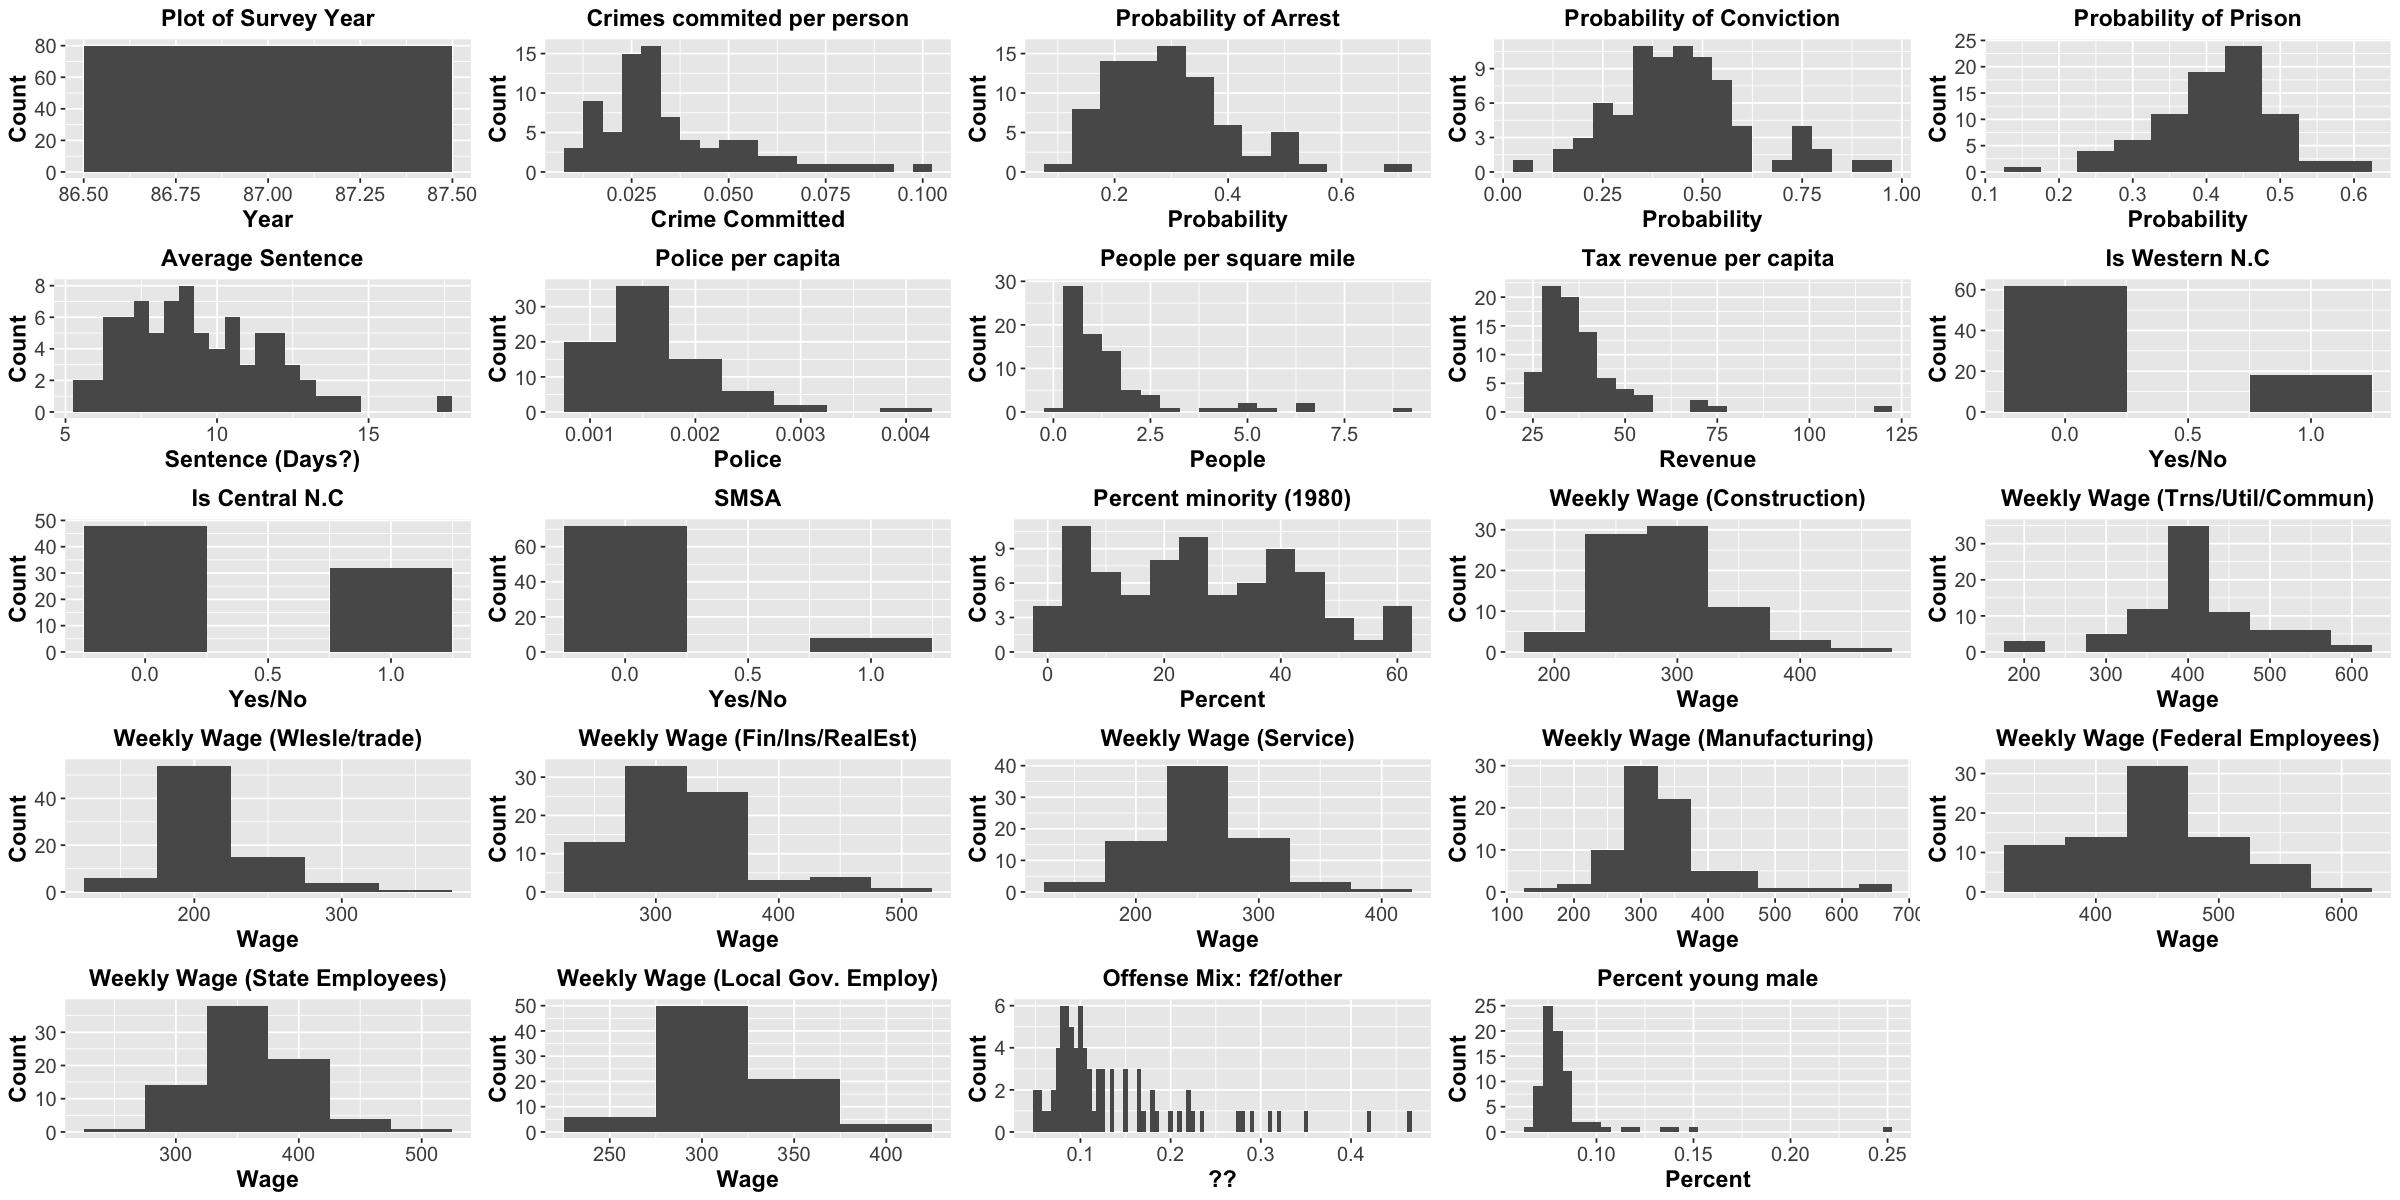

In [13]:
options(repr.plot.width=20, repr.plot.height=10)

p2<-ggplot(data=data_set.indexed, aes(data_set.indexed$year)) + geom_histogram(binwidth=1) + ggtitle("Plot of Survey Year") +
  xlab("Year") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p3<-ggplot(data=data_set.indexed, aes(data_set.indexed$crmrte)) + geom_histogram(binwidth=0.005) + ggtitle("Crimes commited per person") +
  xlab("Crime Committed") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p4<-ggplot(data=data_set.indexed, aes(data_set.indexed$prbarr)) + geom_histogram(binwidth=0.05) + ggtitle("Probability of Arrest") +
  xlab("Probability") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p5<-ggplot(data=data_set.indexed, aes(data_set.indexed$prbconv)) + geom_histogram(binwidth=0.05) + ggtitle("Probability of Conviction") +
  xlab("Probability") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p6<-ggplot(data=data_set.indexed, aes(data_set.indexed$prbpris)) + geom_histogram(binwidth=0.05) + ggtitle("Probability of Prison") +
  xlab("Probability") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p7<-ggplot(data=data_set.indexed, aes(data_set.indexed$avgsen)) + geom_histogram(binwidth=0.5) + ggtitle("Average Sentence") +
  xlab("Sentence (Days?)") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p8<-ggplot(data=data_set.indexed, aes(data_set.indexed$polpc)) + geom_histogram(binwidth=0.0005) + ggtitle("Police per capita") +
  xlab("Police") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p9<-ggplot(data=data_set.indexed, aes(data_set.indexed$density)) + geom_histogram(binwidth=0.5) + ggtitle("People per square mile") +
  xlab("People") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p10<-ggplot(data=data_set.indexed, aes(data_set.indexed$taxpc)) + geom_histogram(binwidth=5) + ggtitle("Tax revenue per capita") +
  xlab("Revenue") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p11<-ggplot(data=data_set.indexed, aes(data_set.indexed$west)) + geom_histogram(binwidth=0.5) + ggtitle("Is Western N.C") +
  xlab("Yes/No") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p12<-ggplot(data=data_set.indexed, aes(data_set.indexed$central)) + geom_histogram(binwidth=0.5) + ggtitle("Is Central N.C") +
  xlab("Yes/No") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p13<-ggplot(data=data_set.indexed, aes(data_set.indexed$urban)) + geom_histogram(binwidth=0.5) + ggtitle("SMSA") +
  xlab("Yes/No") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p14<-ggplot(data=data_set.indexed, aes(data_set.indexed$pctmin80)) + geom_histogram(binwidth=5) + ggtitle("Percent minority (1980)") +
  xlab("Percent") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p15<-ggplot(data=data_set.indexed, aes(data_set.indexed$wcon)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Construction)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p16<-ggplot(data=data_set.indexed, aes(data_set.indexed$wtuc)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Trns/Util/Commun)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p17<-ggplot(data=data_set.indexed, aes(data_set.indexed$wtrd)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Wlesle/trade)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p18<-ggplot(data=data_set.indexed, aes(data_set.indexed$wfir)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Fin/Ins/RealEst)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p19<-ggplot(data=data_set.indexed, aes(data_set.indexed$wser)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Service)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p20<-ggplot(data=data_set.indexed, aes(data_set.indexed$wmfg)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Manufacturing)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p21<-ggplot(data=data_set.indexed, aes(data_set.indexed$wfed)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Federal Employees)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p22<-ggplot(data=data_set.indexed, aes(data_set.indexed$wsta)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (State Employees)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p23<-ggplot(data=data_set.indexed, aes(data_set.indexed$wloc)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Local Gov. Employ)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p24<-ggplot(data=data_set.indexed, aes(data_set.indexed$mix)) + geom_histogram(binwidth=0.005) + ggtitle("Offense Mix: f2f/other") +
  xlab("??") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

p25<-ggplot(data=data_set.indexed, aes(data_set.indexed$pctymle)) + geom_histogram(binwidth=0.005) + ggtitle("Percent young male") +
  xlab("Percent") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

grid.arrange(p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25, ncol = 5)


## Identification and explanation of key variables

### Exploration of Dependent Variable

Crime rate (“crmrte”) is the key dependent variable in this study and represents the number of crimes committed per person in each county.

In [14]:
summary(data_set.indexed$crmrte)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01062 0.02336 0.03051 0.03551 0.04385 0.09897 

We note that the distribution of crime rate is right-skewed.

The number of observations is large enough for modeling without concern for the skew noted in the variable.

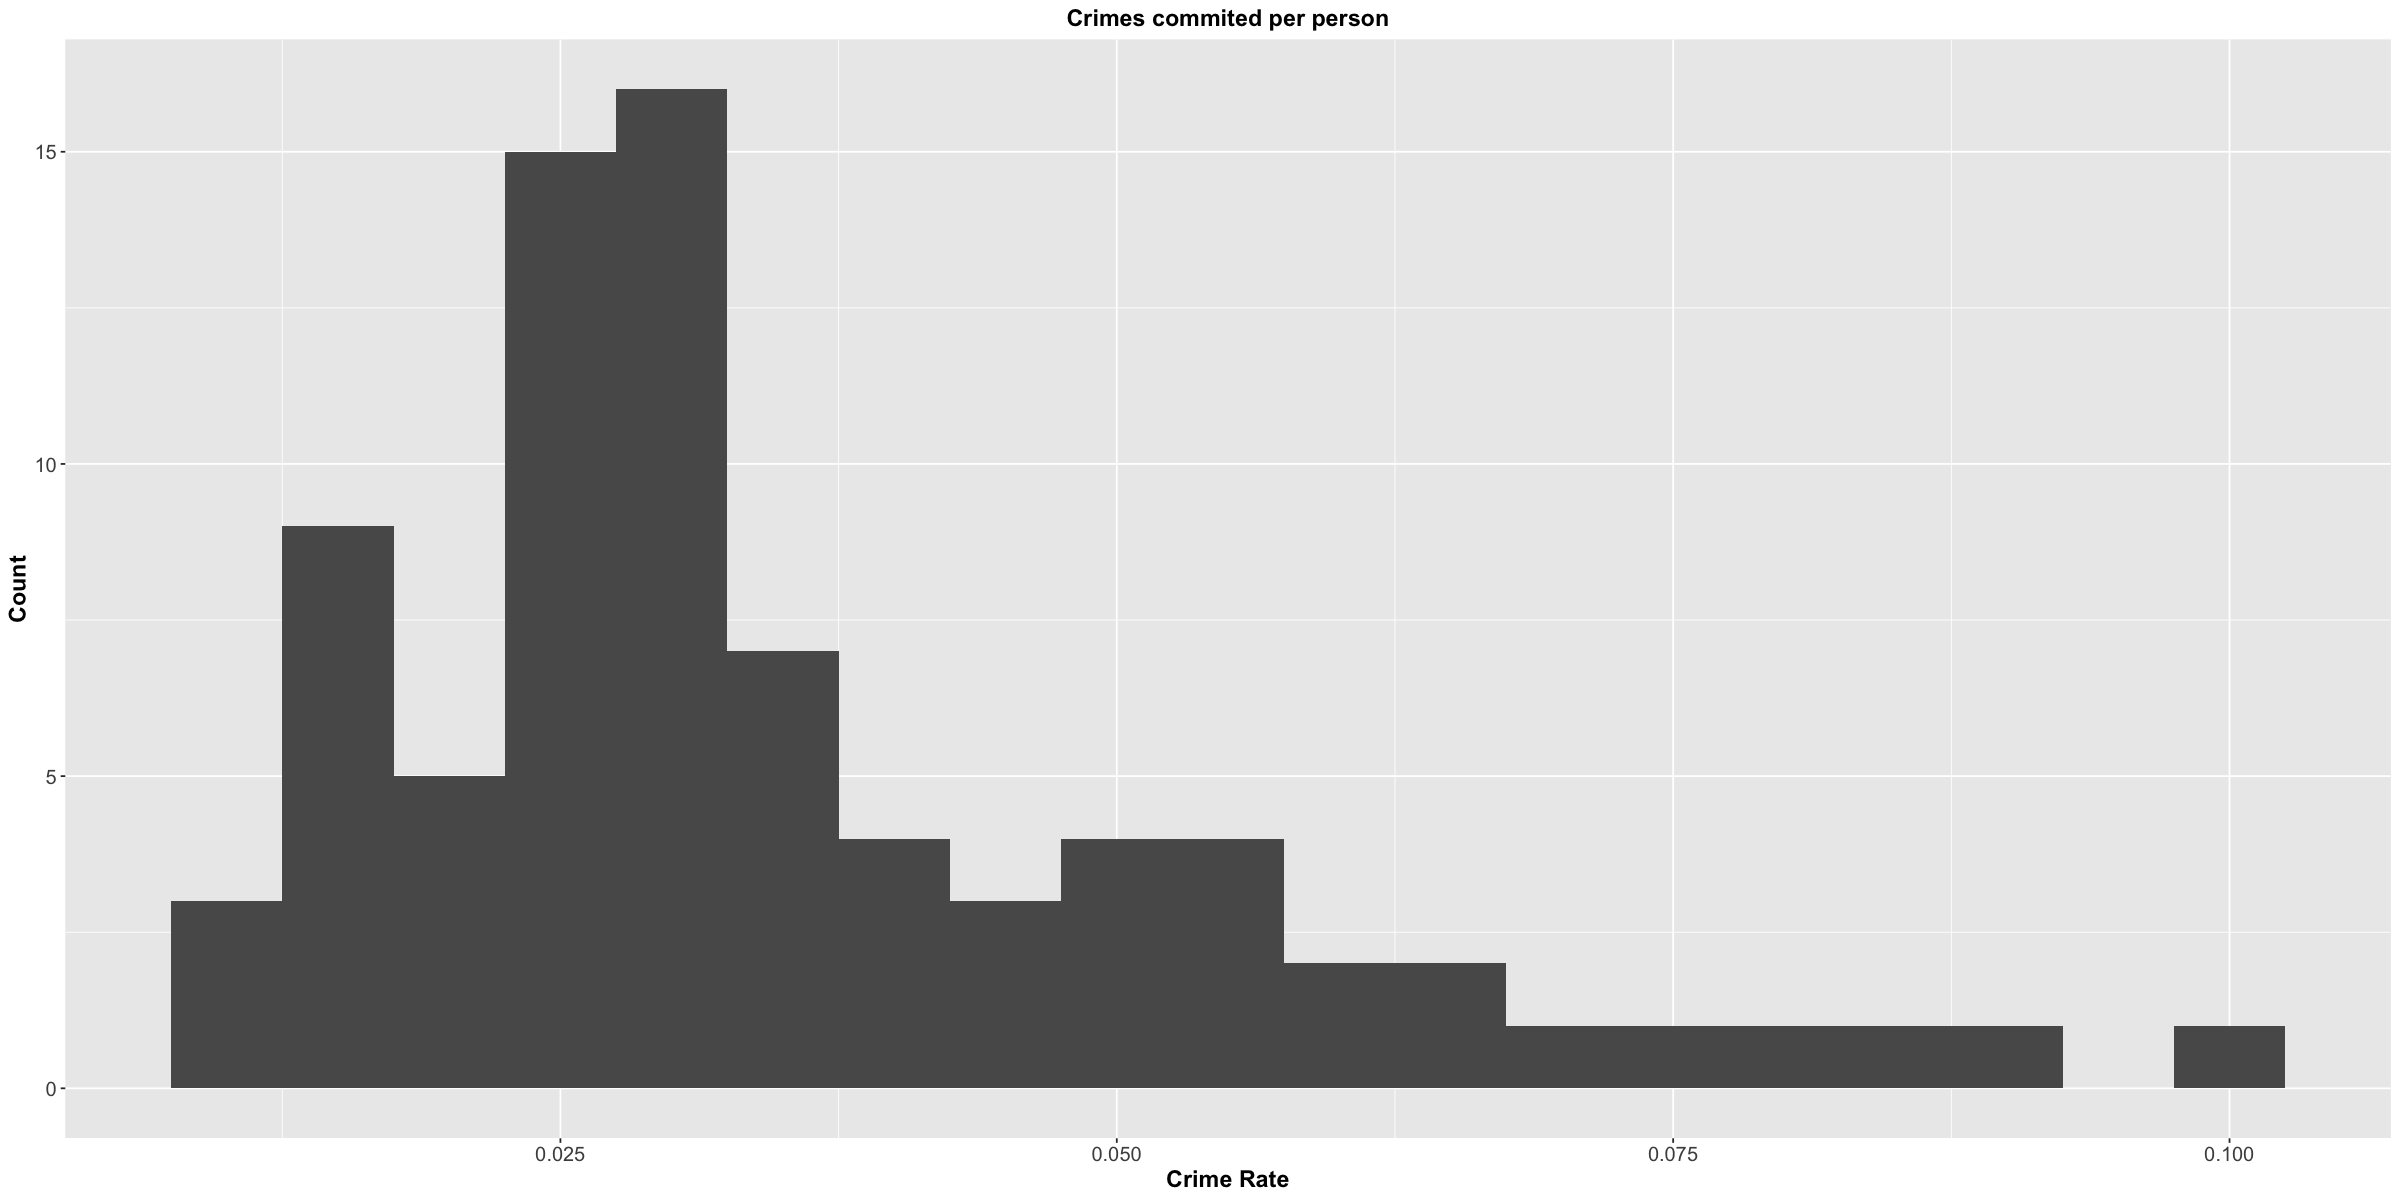

In [15]:
ggplot(data=data_set.indexed, 
       aes(data_set.indexed$crmrte)) + 
            geom_histogram(binwidth=0.005) + 
            ggtitle("Crimes commited per person") + 
            xlab("Crime Rate") + ylab("Count") + 
            theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

We note that the majority of the crime rates per county tend
to be below the 0.050 mark, but there are several counties that have crime rate approximately double that value. 

Consequently, we will perform a log(x) transformation on this variable to improve the normality of the distribution. This is important to satisfy the
normality of errors assumption.

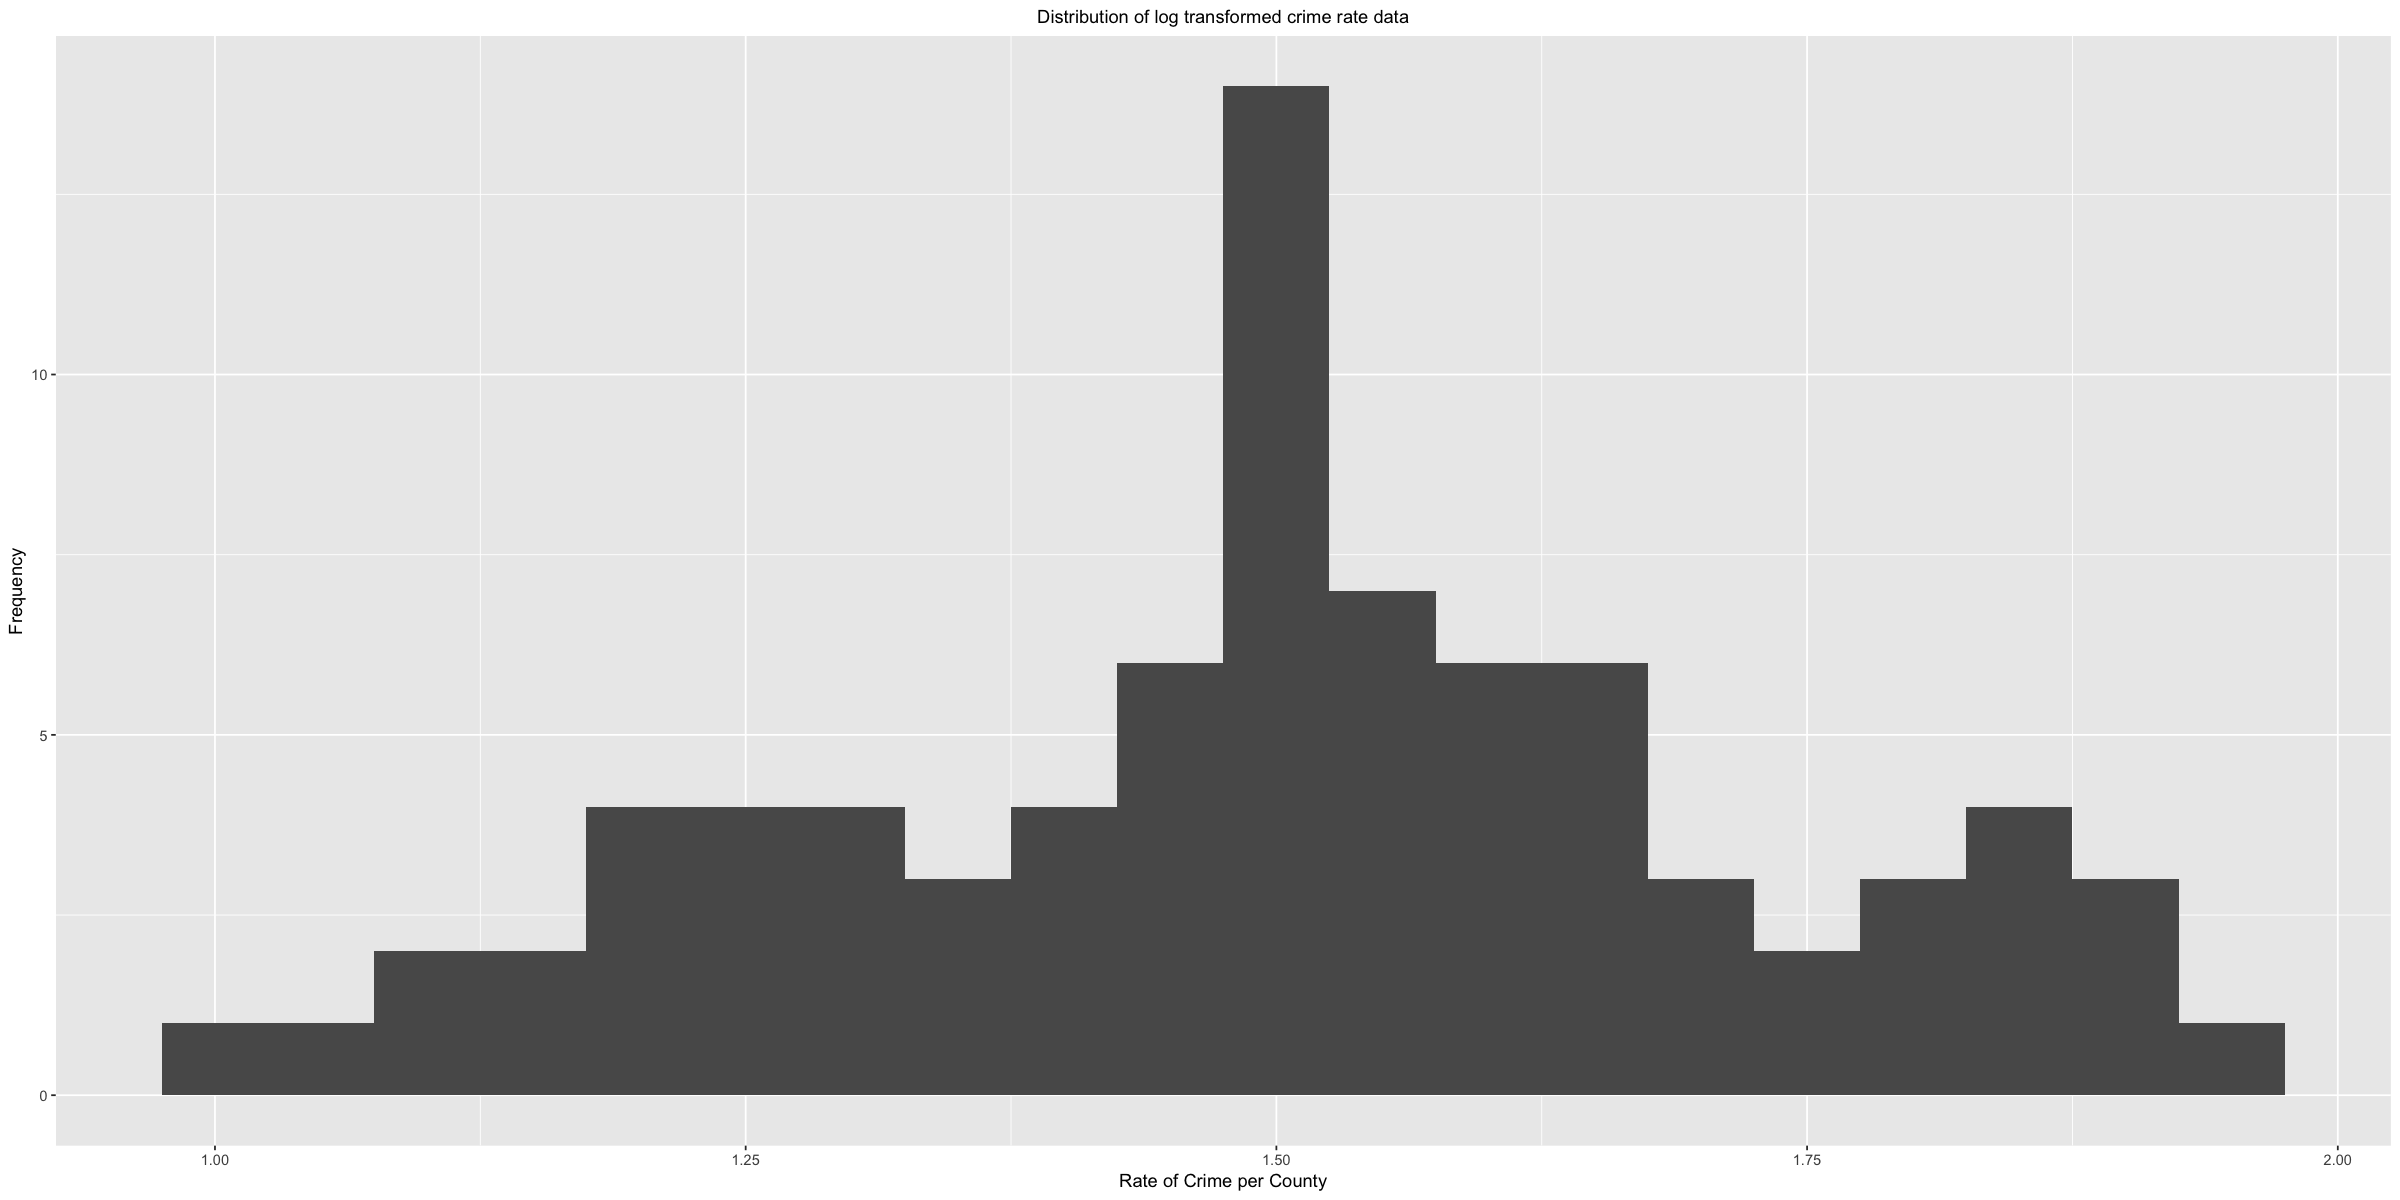

In [16]:
# Histogram with log(crmrte)
plot3 <- qplot(log(crmrte, 0.1), 
                   geom="histogram", 
                   xlab = "Rate of Crime per County", 
                   ylab = "Frequency", 
                   main = "Distribution of log transformed crime rate data", 
                   binwidth=0.05,
                   data = data_set.indexed)

plot3 + theme(plot.title = element_text(hjust = 0.5, size=11))

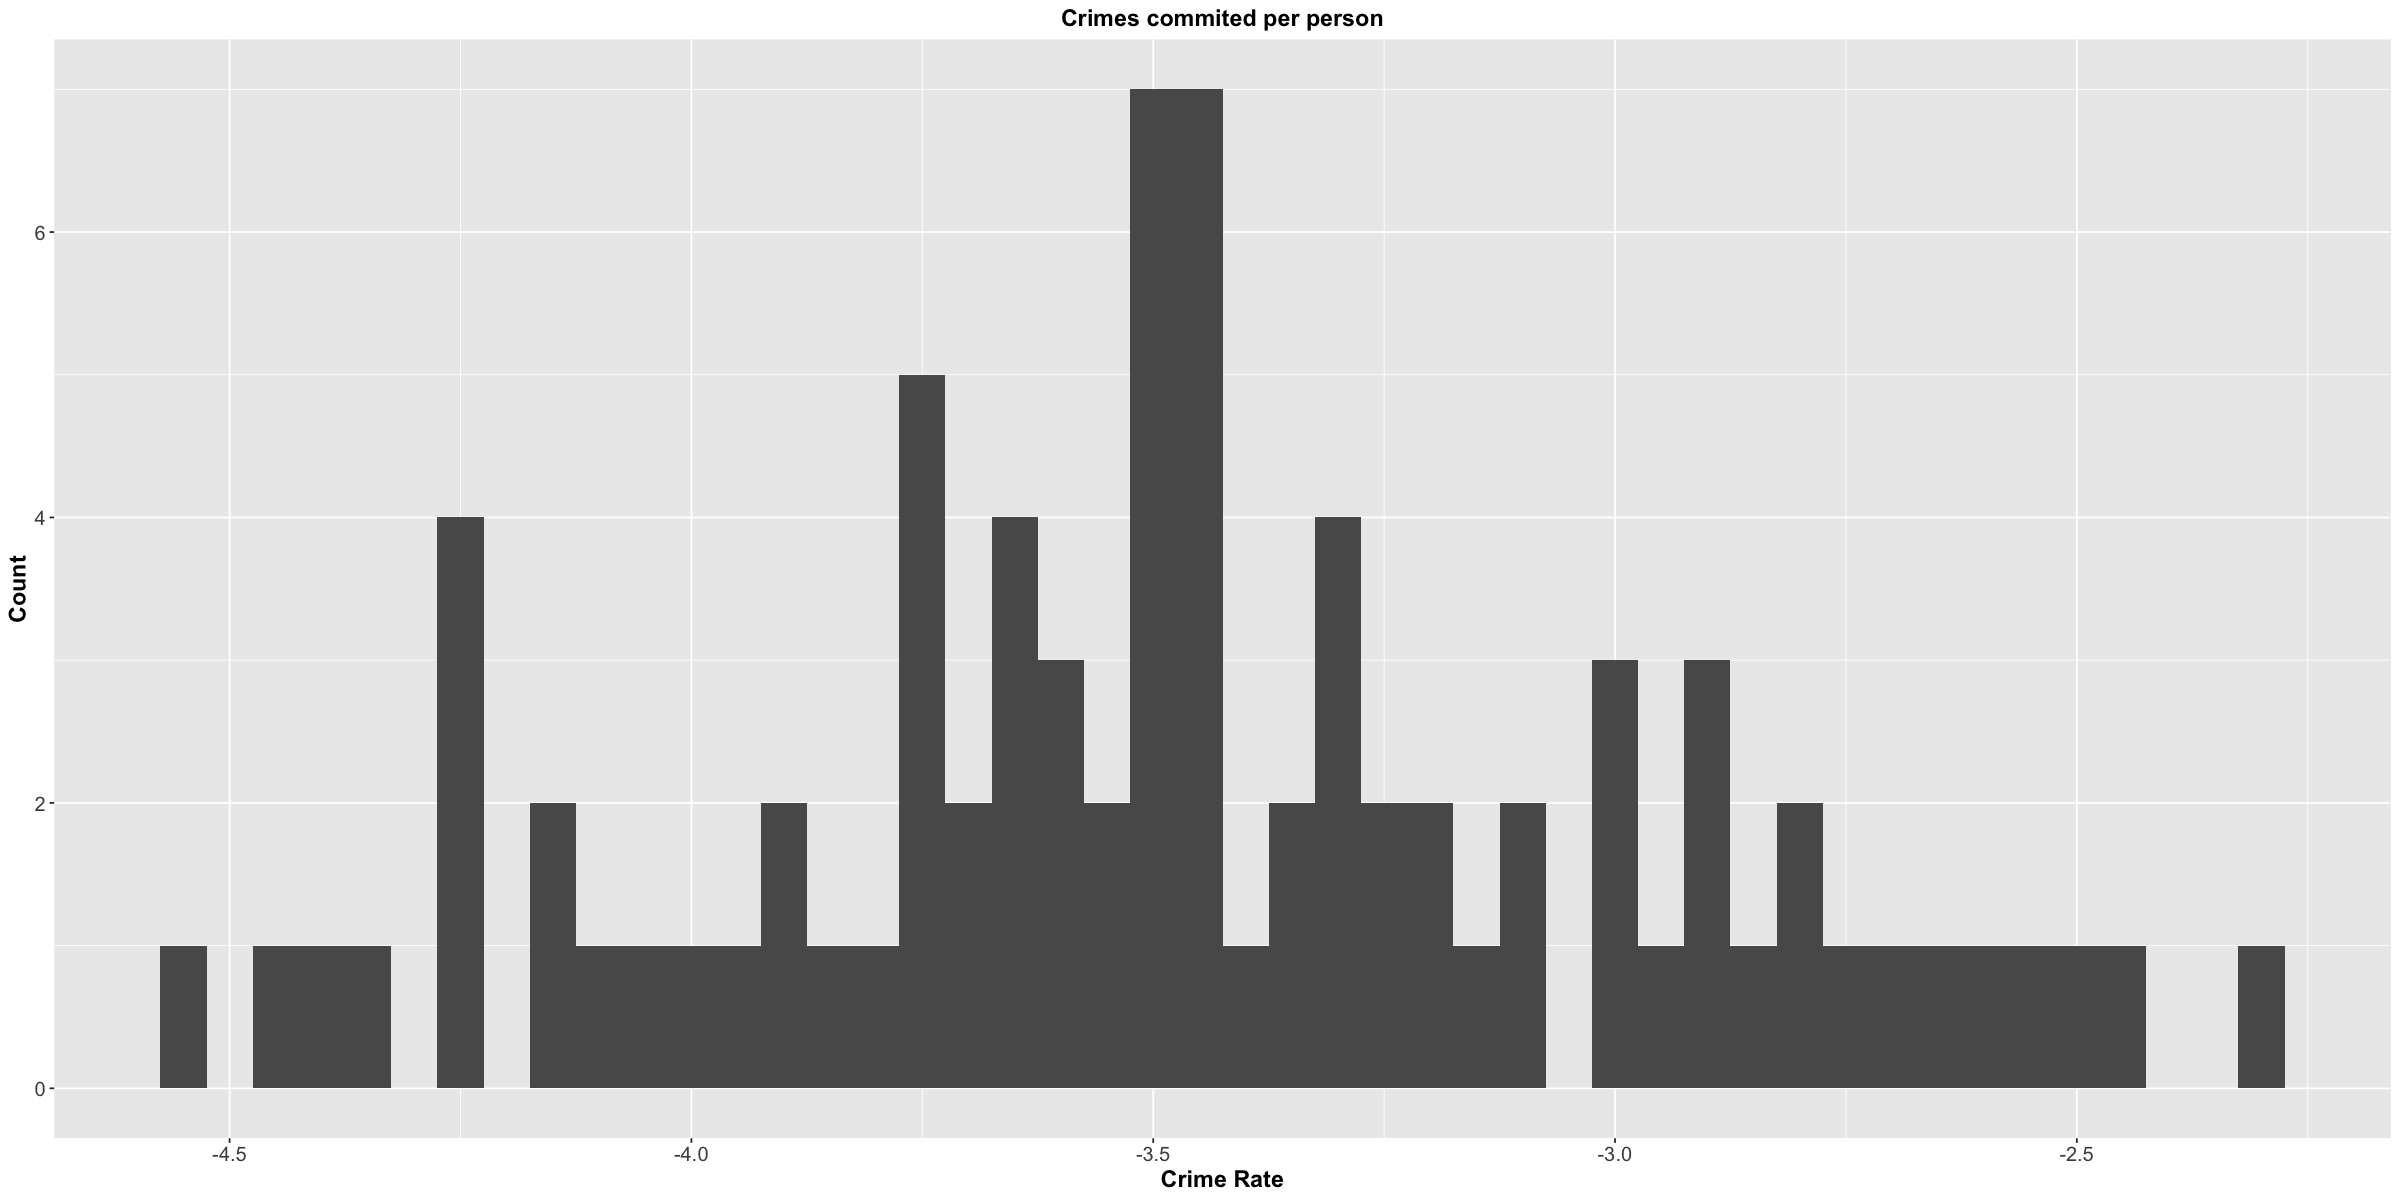

In [17]:
ggplot(data=data_set.indexed, aes(log(data_set.indexed$crmrte))) + 
geom_histogram(binwidth=.05) + 
ggtitle("Crimes commited per person") + 
xlab("Crime Rate") + ylab("Count") + 
theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),
        axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) 

### Identification of Independent Variables

Having now explored the shape and interesting features of each variable individually, we now look at the correlation of each variable with the outcome variable that we are interested in - crime rate.

We will exclude non-numeric variables (county, year, west, central, and urban) from the correlation matrix.

In [18]:
cat_vars = names(data_set.indexed) %in% c("county", "year", "west","central","urban")
cor_data <- data_set.indexed[!cat_vars]
cor_result <- round(cor(cor_data), 2)
first_cors <- sort(cor_result[1,], decreasing = T)

knitr::kable(first_cors, col.names = c("Correlation"),booktabs=T)



|         | Correlation|
|:--------|-----------:|
|crmrte   |        1.00|
|density  |        0.72|
|polpc    |        0.56|
|taxpc    |        0.48|
|wfed     |        0.48|
|wloc     |        0.43|
|wtrd     |        0.41|
|wmfg     |        0.39|
|wcon     |        0.36|
|wfir     |        0.35|
|wser     |        0.34|
|pctymle  |        0.29|
|wtuc     |        0.27|
|wsta     |        0.19|
|pctmin80 |        0.17|
|avgsen   |        0.13|
|prbpris  |        0.05|
|mix      |       -0.24|
|prbconv  |       -0.30|
|prbarr   |       -0.51|

Looking at the correlations of our cleaned data set, we elect to explore **population density, police per capita**, and **tax revenue per capita** since they have ***high correlations*** with crime rate. 

Additionally, we will also choose **probability of arrest** and **probability of conviction** because they have ***high negative correlation*** with crime rate.

### Exploration of Dependent variables

In [29]:
first_covs <- c("density", "polpc", "taxpc", "prbarr","prbconv")
crime_first_covs <- names(data_set.indexed) %in% first_covs
first_cov_data <- data_set.indexed[crime_first_covs]

stargazer(first_cov_data, header = FALSE, type = 'text')


Statistic N   Mean  St. Dev.   Min   Pctl(25) Pctl(75)   Max  
--------------------------------------------------------------
prbarr    80 0.297   0.109    0.093   0.220    0.351    0.689 
prbconv   80 0.446   0.172    0.068   0.333    0.526    0.973 
polpc     80 0.002   0.001    0.001   0.001    0.002    0.004 
density   80 1.517   1.588   0.00002  0.560    1.595    8.828 
taxpc     80 38.161  13.307  25.693   30.958   40.869  119.761
--------------------------------------------------------------


Now we will look at the covariates that we listed above to determine whether any variable transformations are necessary.

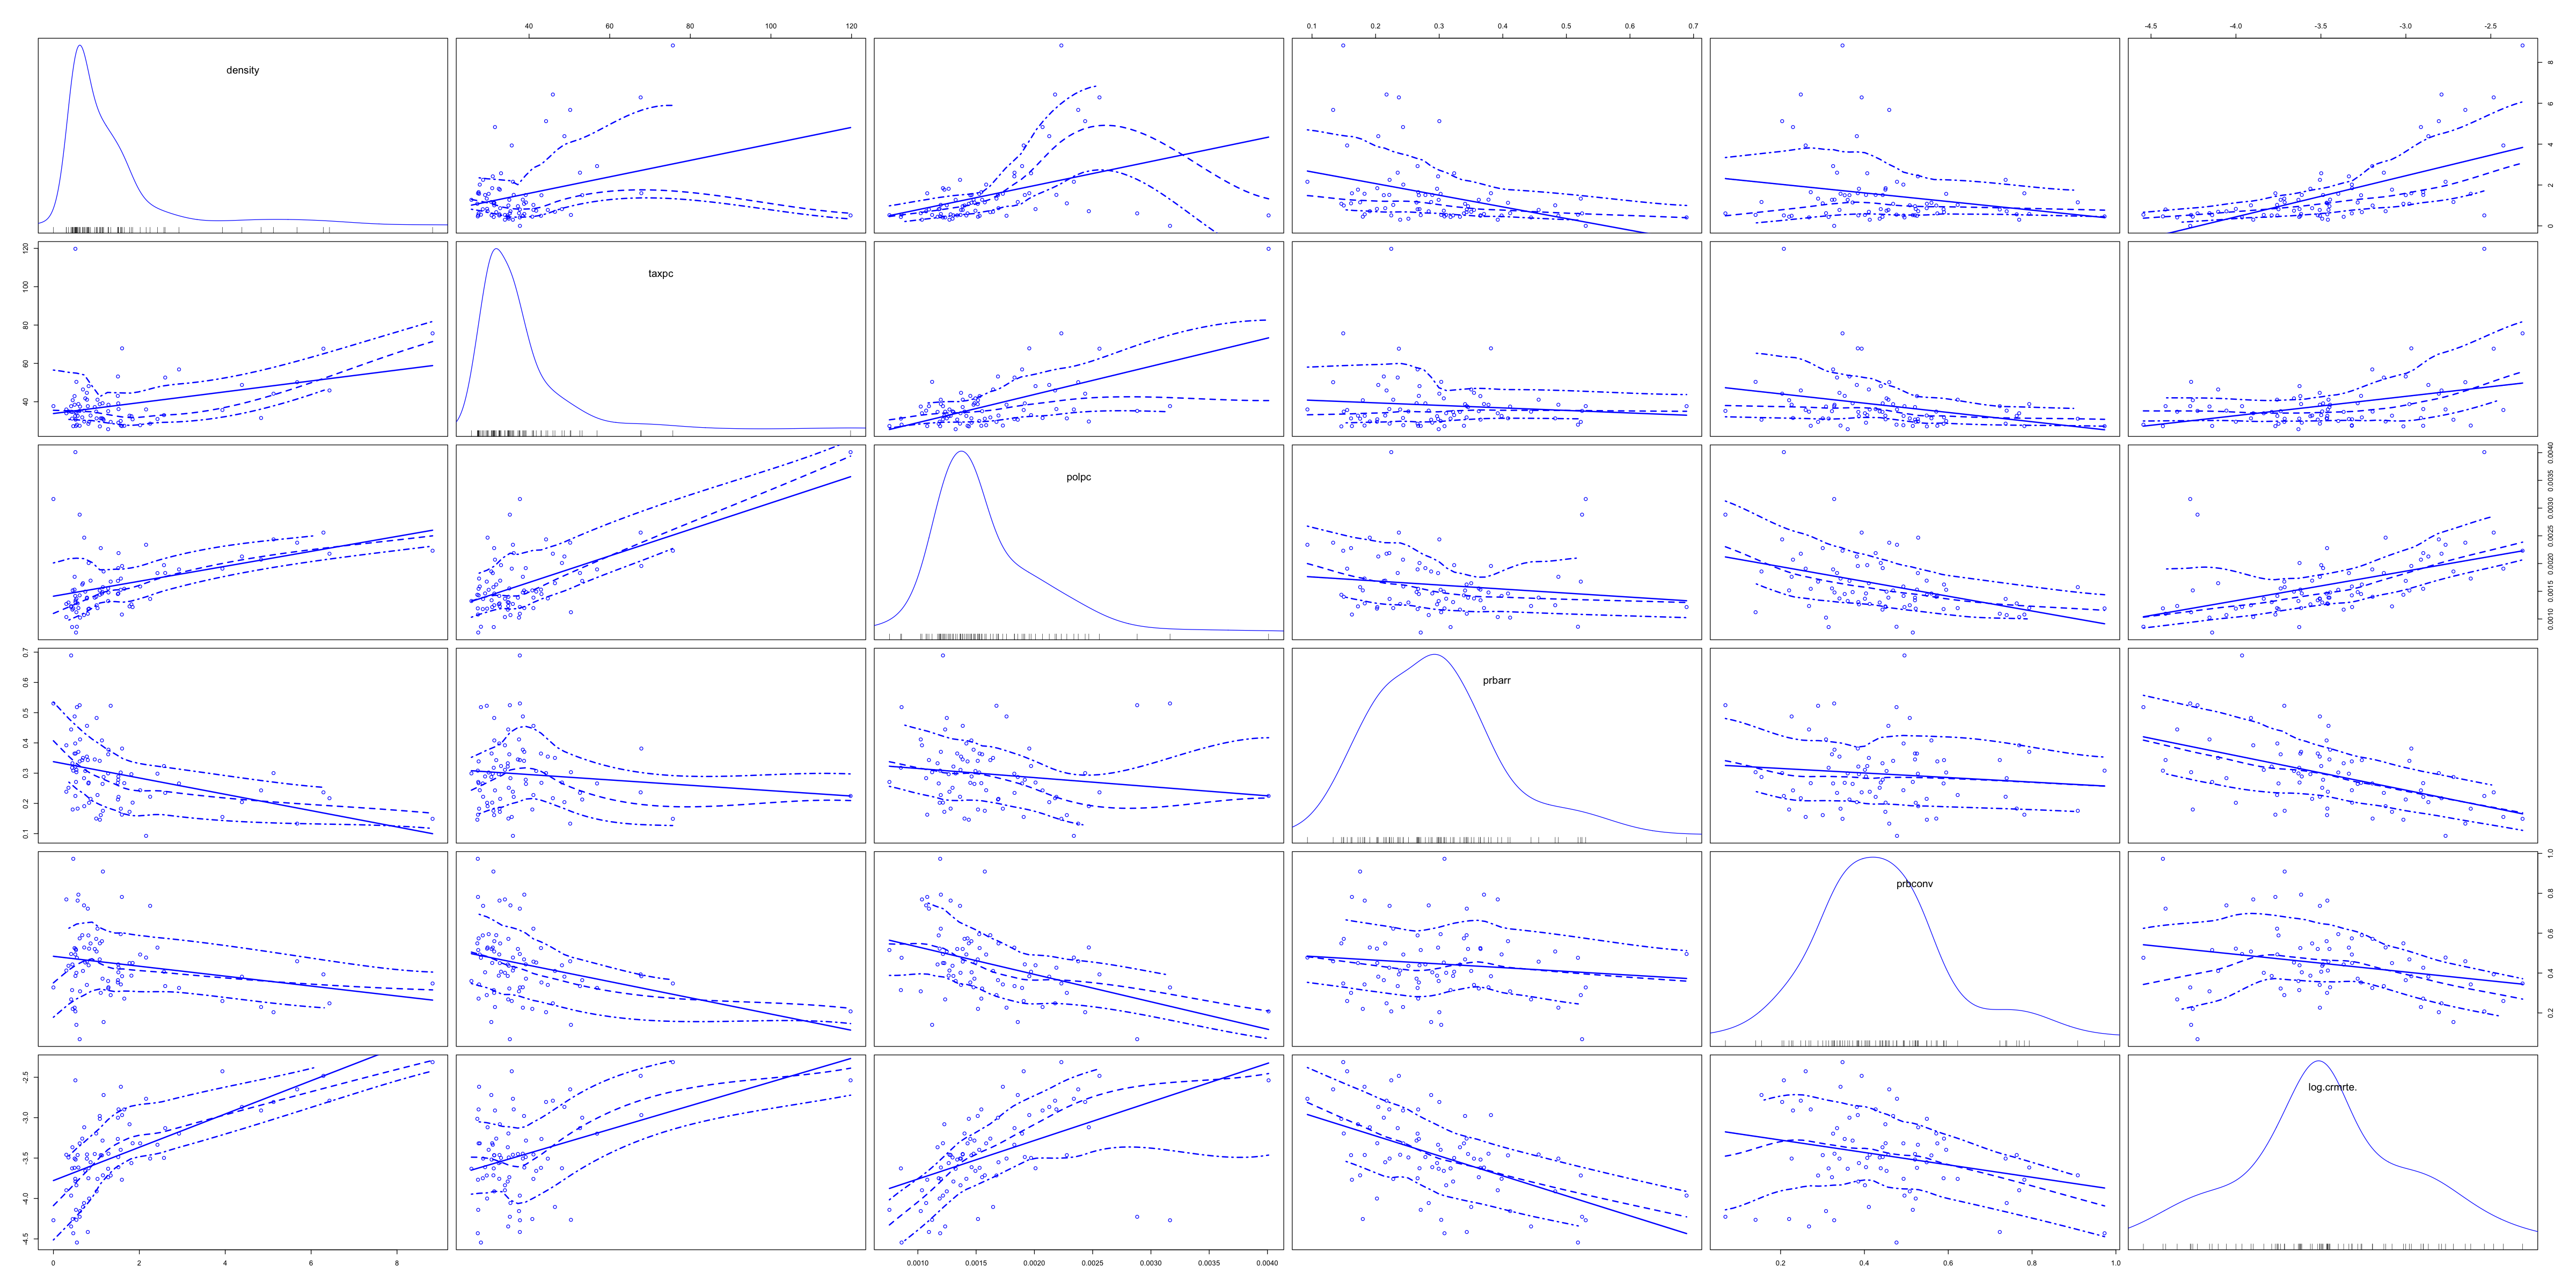

In [30]:
options(repr.plot.width=40, repr.plot.height=20)

density <- data_set.indexed$density
taxpc <- data_set.indexed$taxpc
taxpc <- data_set.indexed$polpc
prbarr <- data_set.indexed$prbarr
prbconv <- data_set.indexed$prbconv
scatterplotMatrix(~ (density) + (taxpc) + (polpc) + (prbarr) + (prbconv) + log(crmrte),
data = data_set.indexed)

We note that, per our initial EDA, that density, taxpc, and polpc all have a fairly large positive correlation with crime rate, while prbconv and prbarr have a large negative corelation.

We will attempt to make these distributions normal. We apply log to all of the variables except for density. We note that density has a large grouping near the min value and note that it can be better transformed with the square root function.

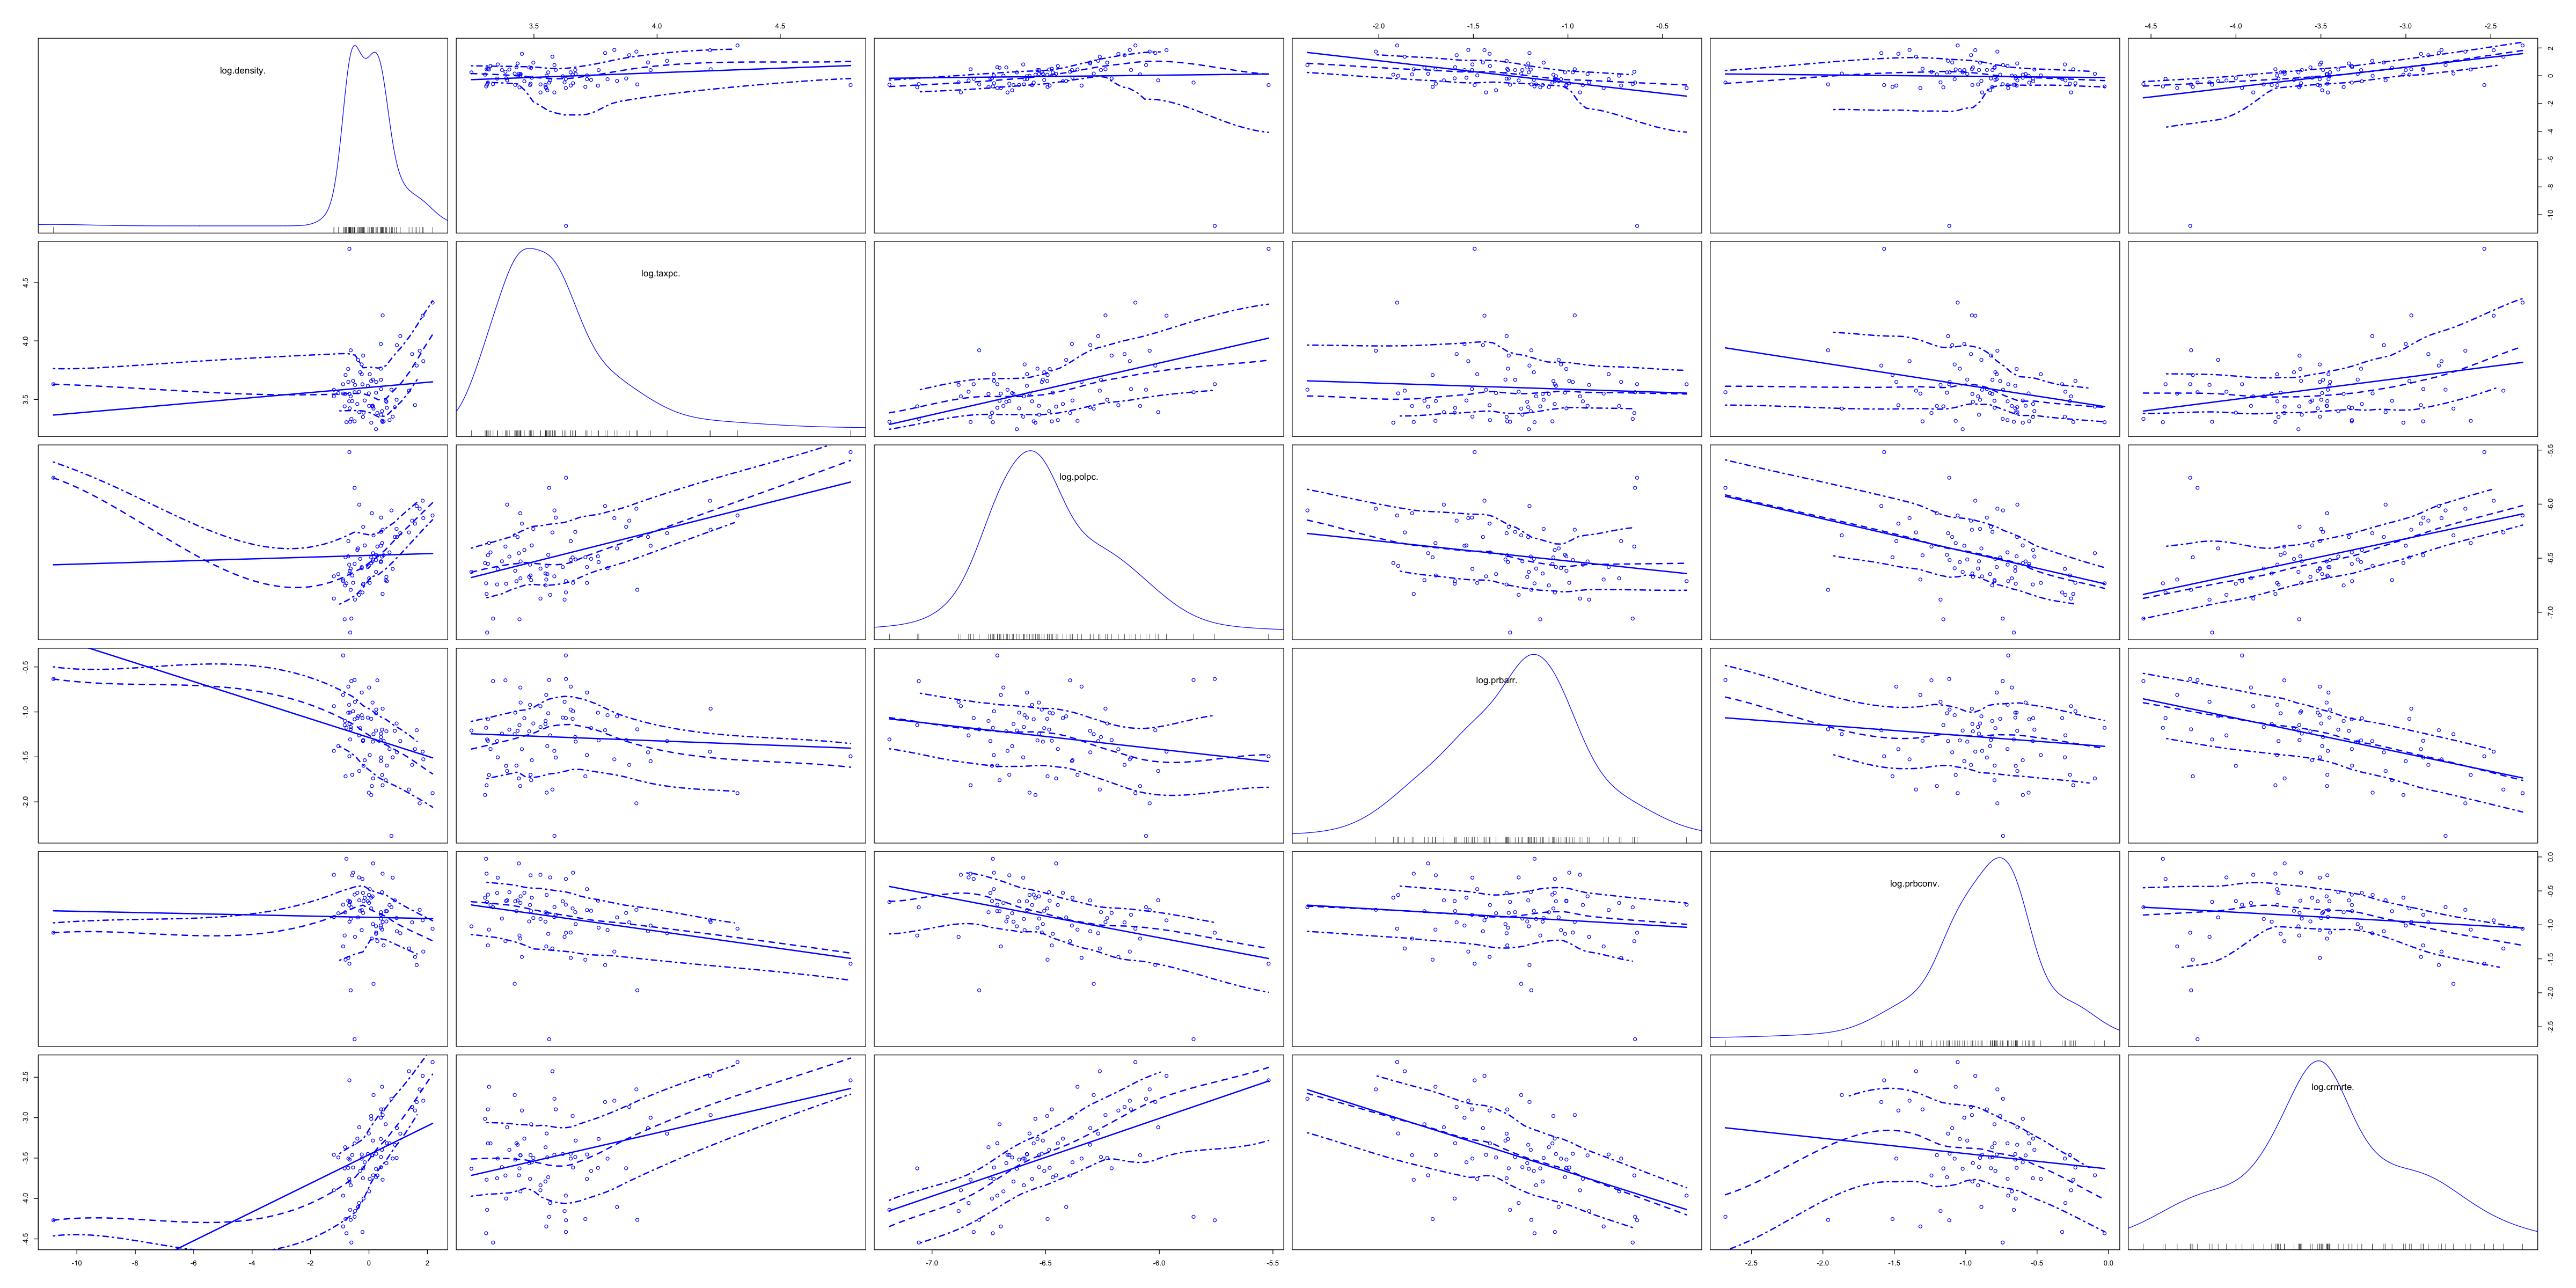

In [31]:
scatterplotMatrix(~ log(density) + log(taxpc) + log(polpc) + log(prbarr) + log(prbconv) + log(crmrte),
data = data_set.indexed)

>Suggestions from Review
>- Proper formatting for prbconv column applied
>- For rows with Prob >1, consider cap at 1 rather than throwing away (I think in lecture they also say don't toss outliers in most situations)
>- They said in their paper they saw that one of the points in service wage was erroneous

# Model Building

>Testing all 6 assumptions would be a good step as well.

>Suggestions from Review
>- Tie model building process with research question
>- Maybe use some variables as indicator variables (They pointed out location variables like west, central, urban)
>- prbarr and prconv are already seem normally distributed in scatterplot, log transform made it more negatively skewed. Need to provide more reason to apply transformation
>- Log transform density would also fix distribution (like it did for tax) (I applied log to take a look seen above)
>- Normality in errors assumption (MLR6) is not violated by independant variable skewedness, check Residuals QQplot and histogram.
>- Sqrt density is hard to interpret, and therefore hard to draw conclusions
>- Evaluate MLR assumptions, Provide interpretations of the results of the model (M1-3)
>- They viewed PolPC drove crime rate (Like the NY study in class)
>- Wage is a good candidate for log()
>- Tax per capita is a good alternative for wage, if looking at combined effect
>- Urban can be indicator variable, so factorization might not be needed
>- Model 2 should be predictors that improve accuracy, there are predictors that are not significant (M1 might benefit from having less factors and use only the ones we think are most important, so we can add additional ones in M2 that can help improve the model, but are not necessarially as significant as the ones in M1)
>- Model diagnosis needed



## Model 1: Base model with only primary covariates

This first model helps us understand how our primary covariates affect crime rate.

### Model specifications

**Log-Log**

\begin{equation} \label{model1}
log(crmrte) = \beta_0 + \beta_1 * log(density) + \beta_2 * log(taxpc) + \beta_3 * log(polpc) + \beta_4 * log(prbarr) + \beta_5 * log(prbconv)
\end{equation}

> TODO Questions - should we exclude primary covariates that do not have an easy way to enact policy on (e.g. density?)

> TODO present a detailed assessment of all 6 classical linear model assumptions. Use plots and other diagnostic tools to assess whether the assumptions appear to be violated, and follow best practices in responding to any violations you find. Note that we only want to see this level of detail for one model specification. For the other specifications, you should also conduct a full assessment of the CLM assumptions, but only highlight major surprises that you notice in your text.
> TODO Note that you may need to change your model specifications in response to violations of the CLM. At this point, you should also consider whether changes are appropriate to decrease standard errors for your estimates. These decisions involve tradeoffs and you should strive to be transparent about them in your report.


In [49]:
model_1 = lm(log(crmrte) ~ log(density) + log(taxpc) + log(polpc) + log(prbarr) + log(prbconv), data=data_set.indexed)

cat("\n ** Model 1: Coefficients **\n\n")
(se.model = sqrt(diag(vcovHC(model_1))))

cat("\nAdjusted R2:", summary(model_1)$adj.r.squared, "\n")
cat("\nF statistic:", summary(model_1)$fstatistic[1], "on", summary(model_1)$fstatistic[2],
"predictor DF and", summary(model_1)$fstatistic[3], "observation DF", "\n")

coeftest(model_1, vcov = vcovHC, level = 0.05)


 ** Model 1: Coefficients **



(Intercept) log(density)   log(taxpc)   log(polpc)  log(prbarr) log(prbconv) 
   2.3426016    0.1026238    0.2079702    0.2704825    0.1516817    0.1986073


Adjusted R2: 0.5936403 

F statistic: 24.08181 on 5 predictor DF and 74 observation DF 



t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.798966   2.342602  0.3411 0.734025   
log(density)  0.129814   0.102624  1.2650 0.209857   
log(taxpc)    0.138959   0.207970  0.6682 0.506105   
log(polpc)    0.802077   0.270482  2.9654 0.004067 **
log(prbarr)  -0.372906   0.151682 -2.4585 0.016292 * 
log(prbconv)  0.048566   0.198607  0.2445 0.807493   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Assess whether CLM assumptions holds

##### Linear population model
Since we have not constrained the error term (i.e haven't required it to be normal), we don't have to check the linear population model at this point.

##### Random Sampling
To check random sampling, we need background knowledge of how the data was collected. 

We know that the data we have is a single cross-section of data, the original study was based on a multi-year panel. Omitted variables could be a major obstacle for our estimates. We will check for causal estimates while taking into account how omitted variables may affect our conclusions.

##### No perfect multicollinearity 
No need to explicitly check for perfect collinearity, because R will alert us if this rare condition happens.

In [34]:
sprintf('Variance Inflation: ')
vif(model_1)
vif(model_1) > 10

[1] "Variance Inflation: "

log(density)   log(taxpc)   log(polpc)  log(prbarr) log(prbconv) 
    1.246822     1.383493     1.725272     1.402568     1.379230

log(density)   log(taxpc)   log(polpc)  log(prbarr) log(prbconv) 
       FALSE        FALSE        FALSE        FALSE        FALSE

We note that all of our chosen regressors are not closely predicted from the other variables because the variance inflation values are relatively low (<2). Hence, ***no perfect multi-collinearity***.

##### Zero-conditional mean
We start looking at the diagnostic plots.

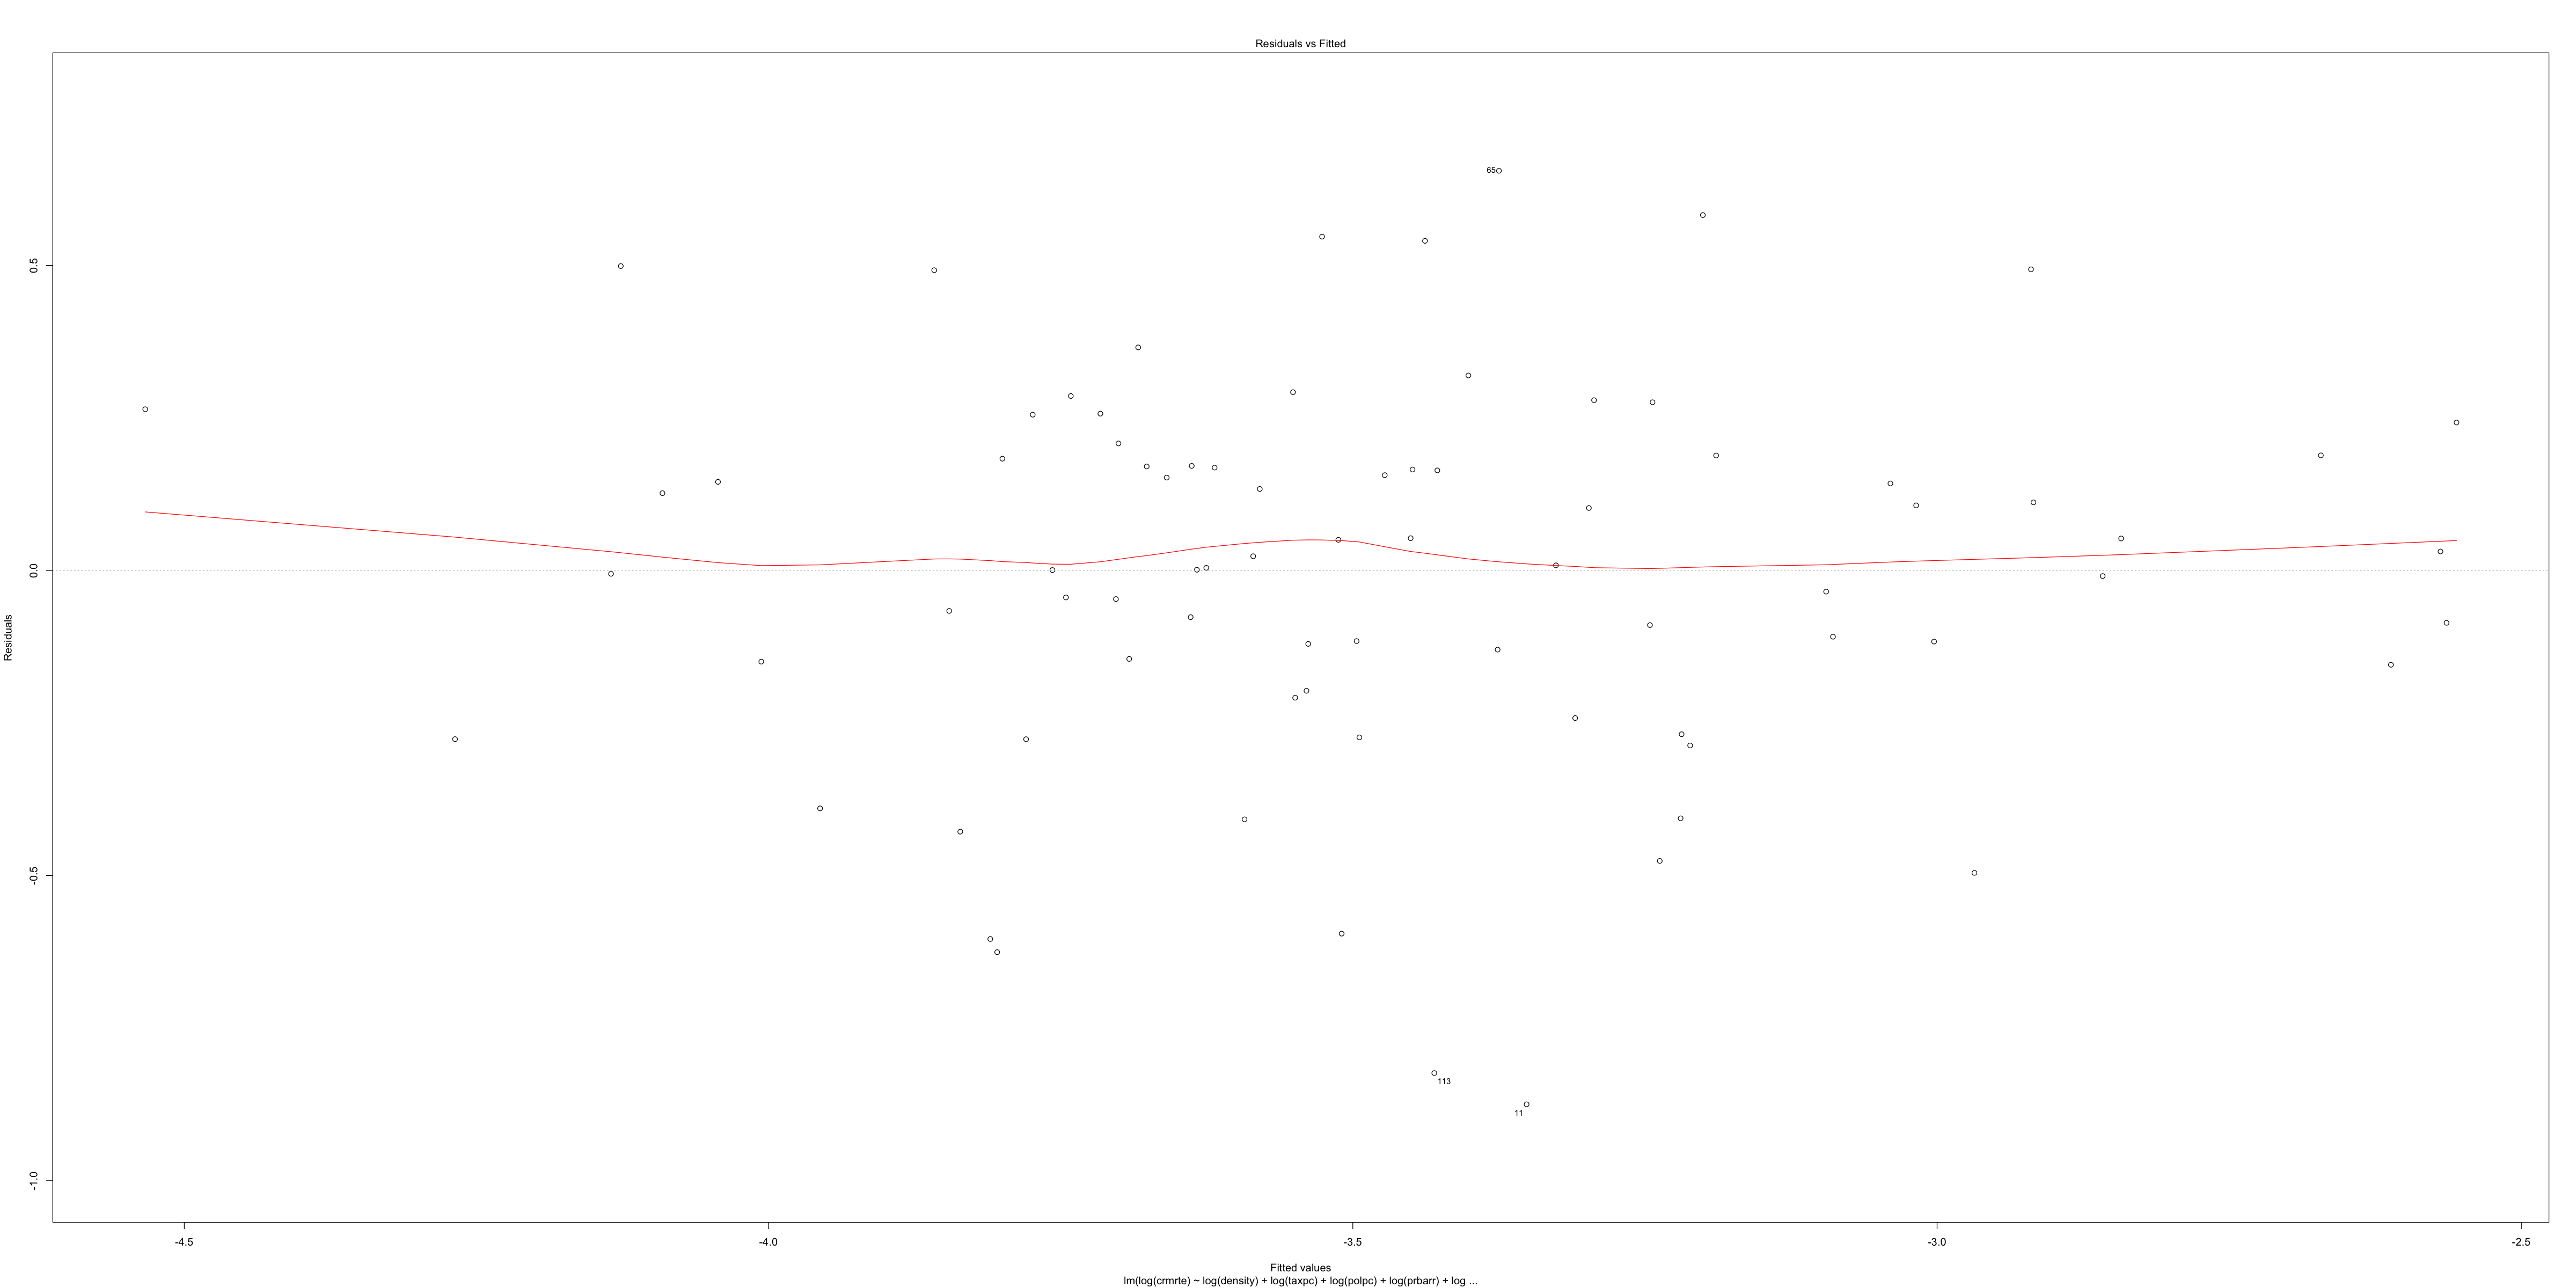

In [35]:
plot(model_1, which = 1)

The current plot does not appear to be quite linear. There may be some non-linear factors unexplained by our model.

We also see that the spline deviates greatly from the zero mean, indicating the model has issues satisfying the zero-mean assumption.


##### Homoskedasticity

Lets look at the scale location plot to test homoskedaticity.

> TODO Explain why we use studentized Breusch-Pagan test

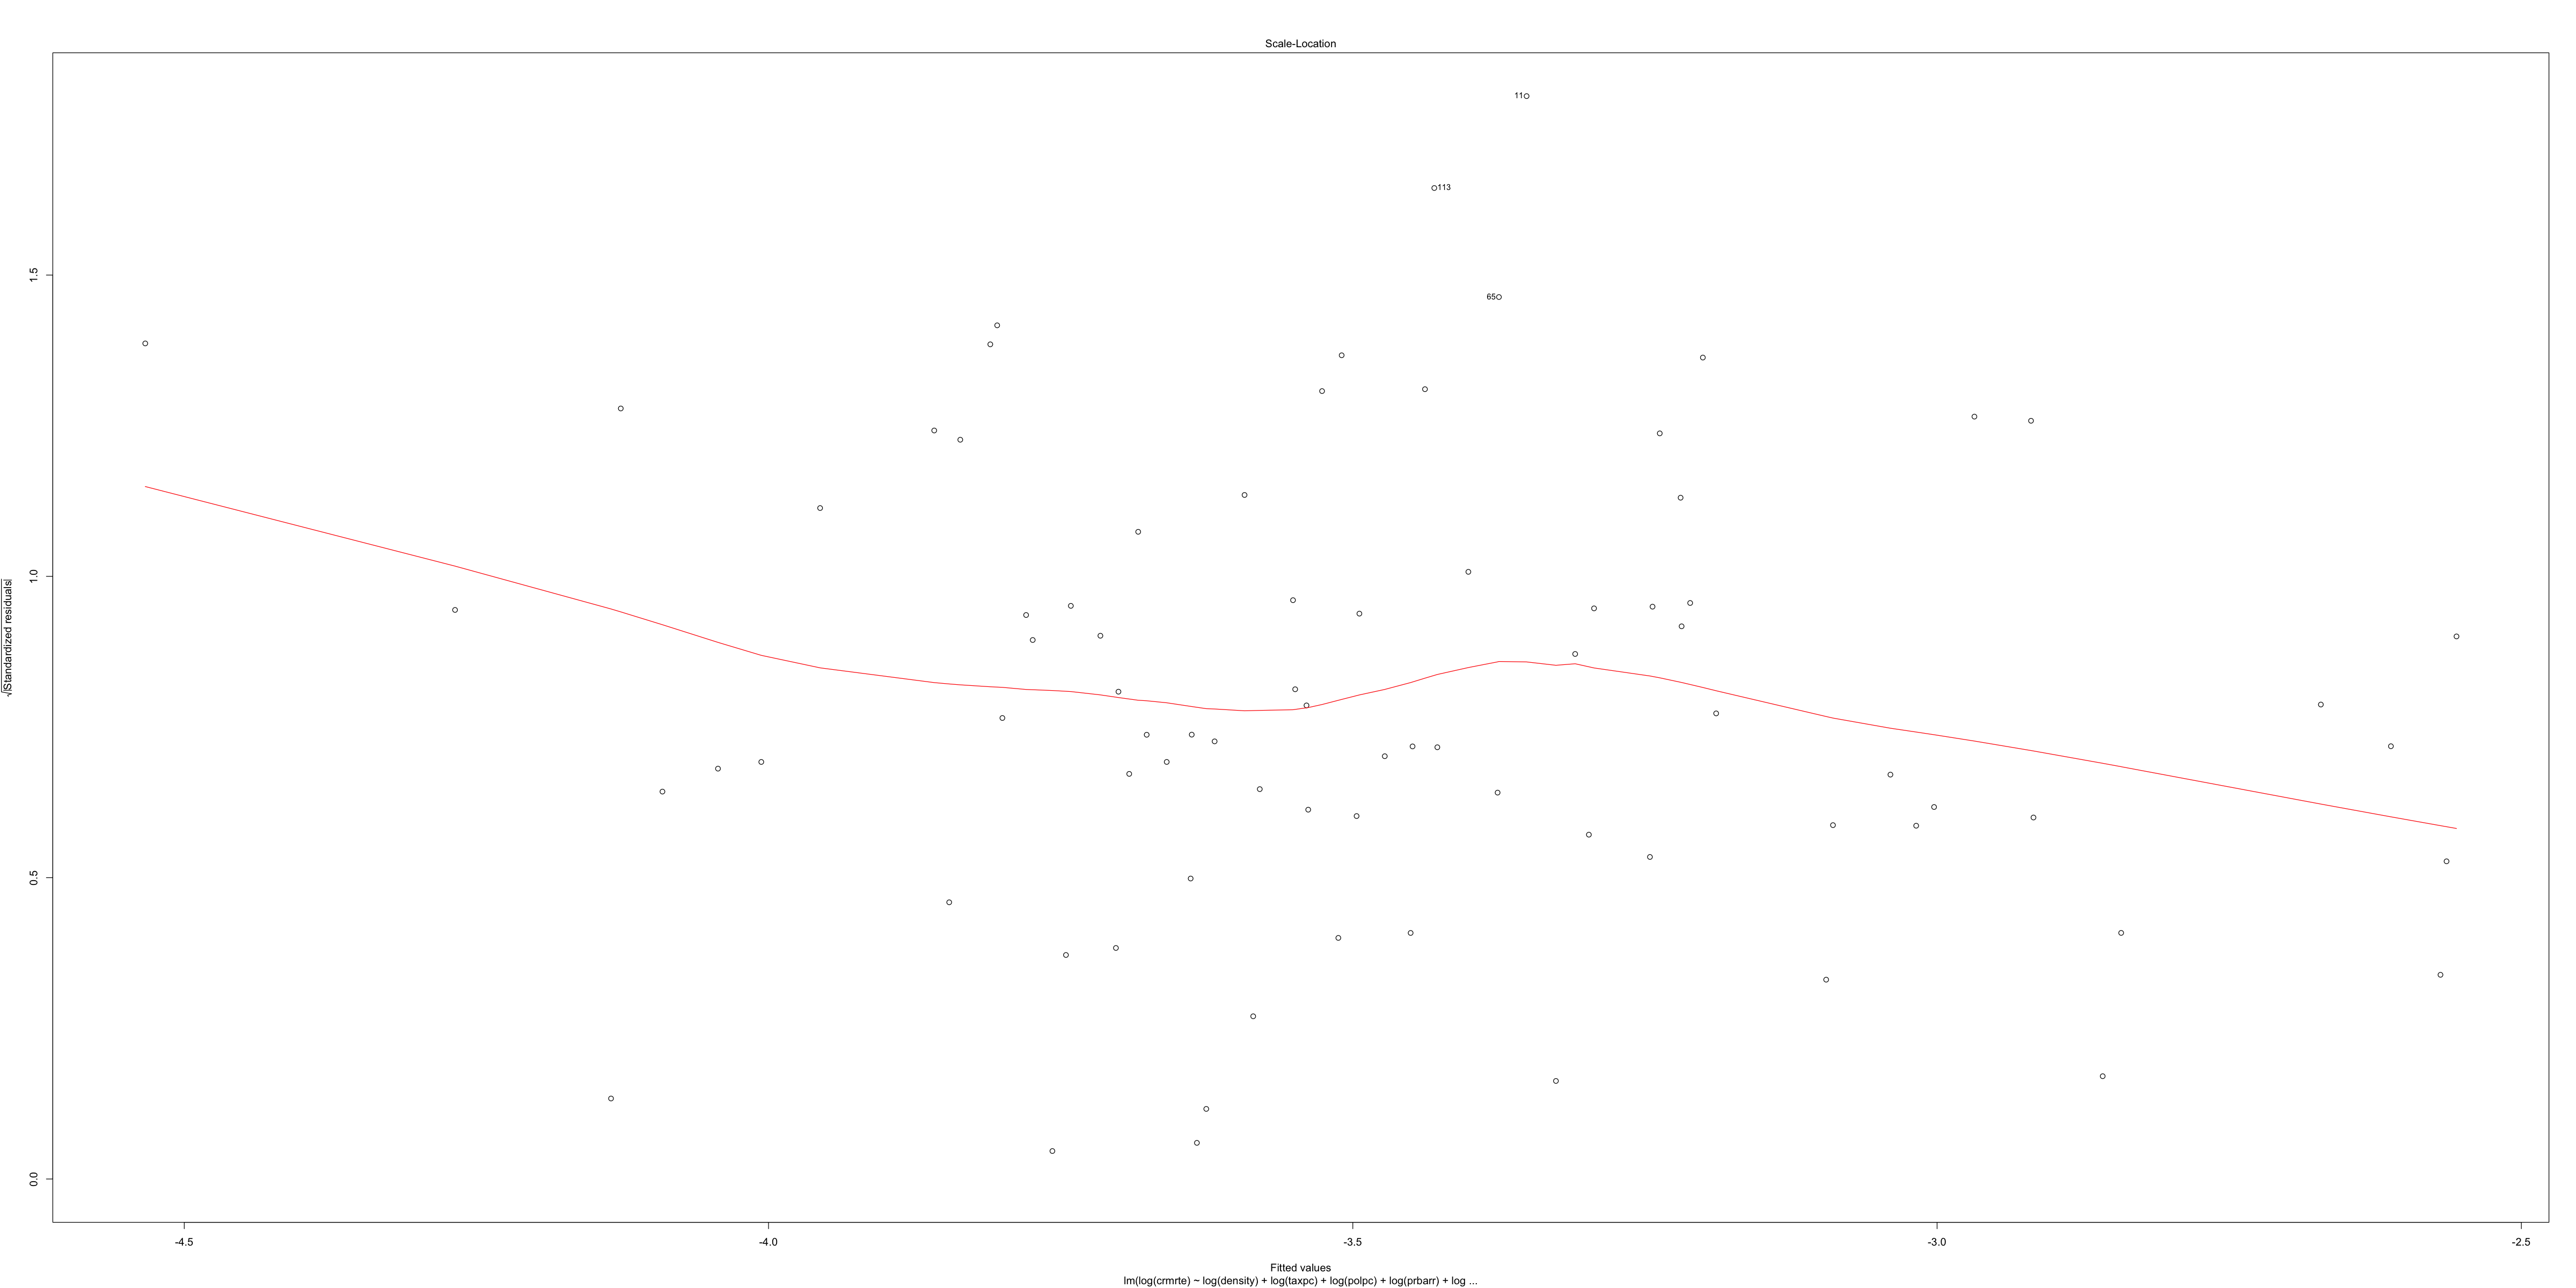

In [36]:
plot(model_1, which = 3)

If residuals are spread equally along the ranges of predictors, it would indicate homoskedasticity. As you can see from the Scale-Location plot, the residuals are almost spread equally along the ranges of predictors. 

This indicates ***homoskedasticity***.

In [37]:
bptest(log(crmrte) ~ log(density) + log(taxpc) + log(polpc) + log(prbarr) + log(prbconv),data=data_set.indexed)


	studentized Breusch-Pagan test

data:  log(crmrte) ~ log(density) + log(taxpc) + log(polpc) + log(prbarr) +     log(prbconv)
BP = 16.659, df = 5, p-value = 0.005193


>TODO: Check - Due to the small p-value from the Breusch-Pagan test and the inconsistant bands seen in the plot, **there is no homoskedacity**.

##### Normality of Errors
To check normality of errors, we can look at the qqplot that's part of R's standard diagnostics

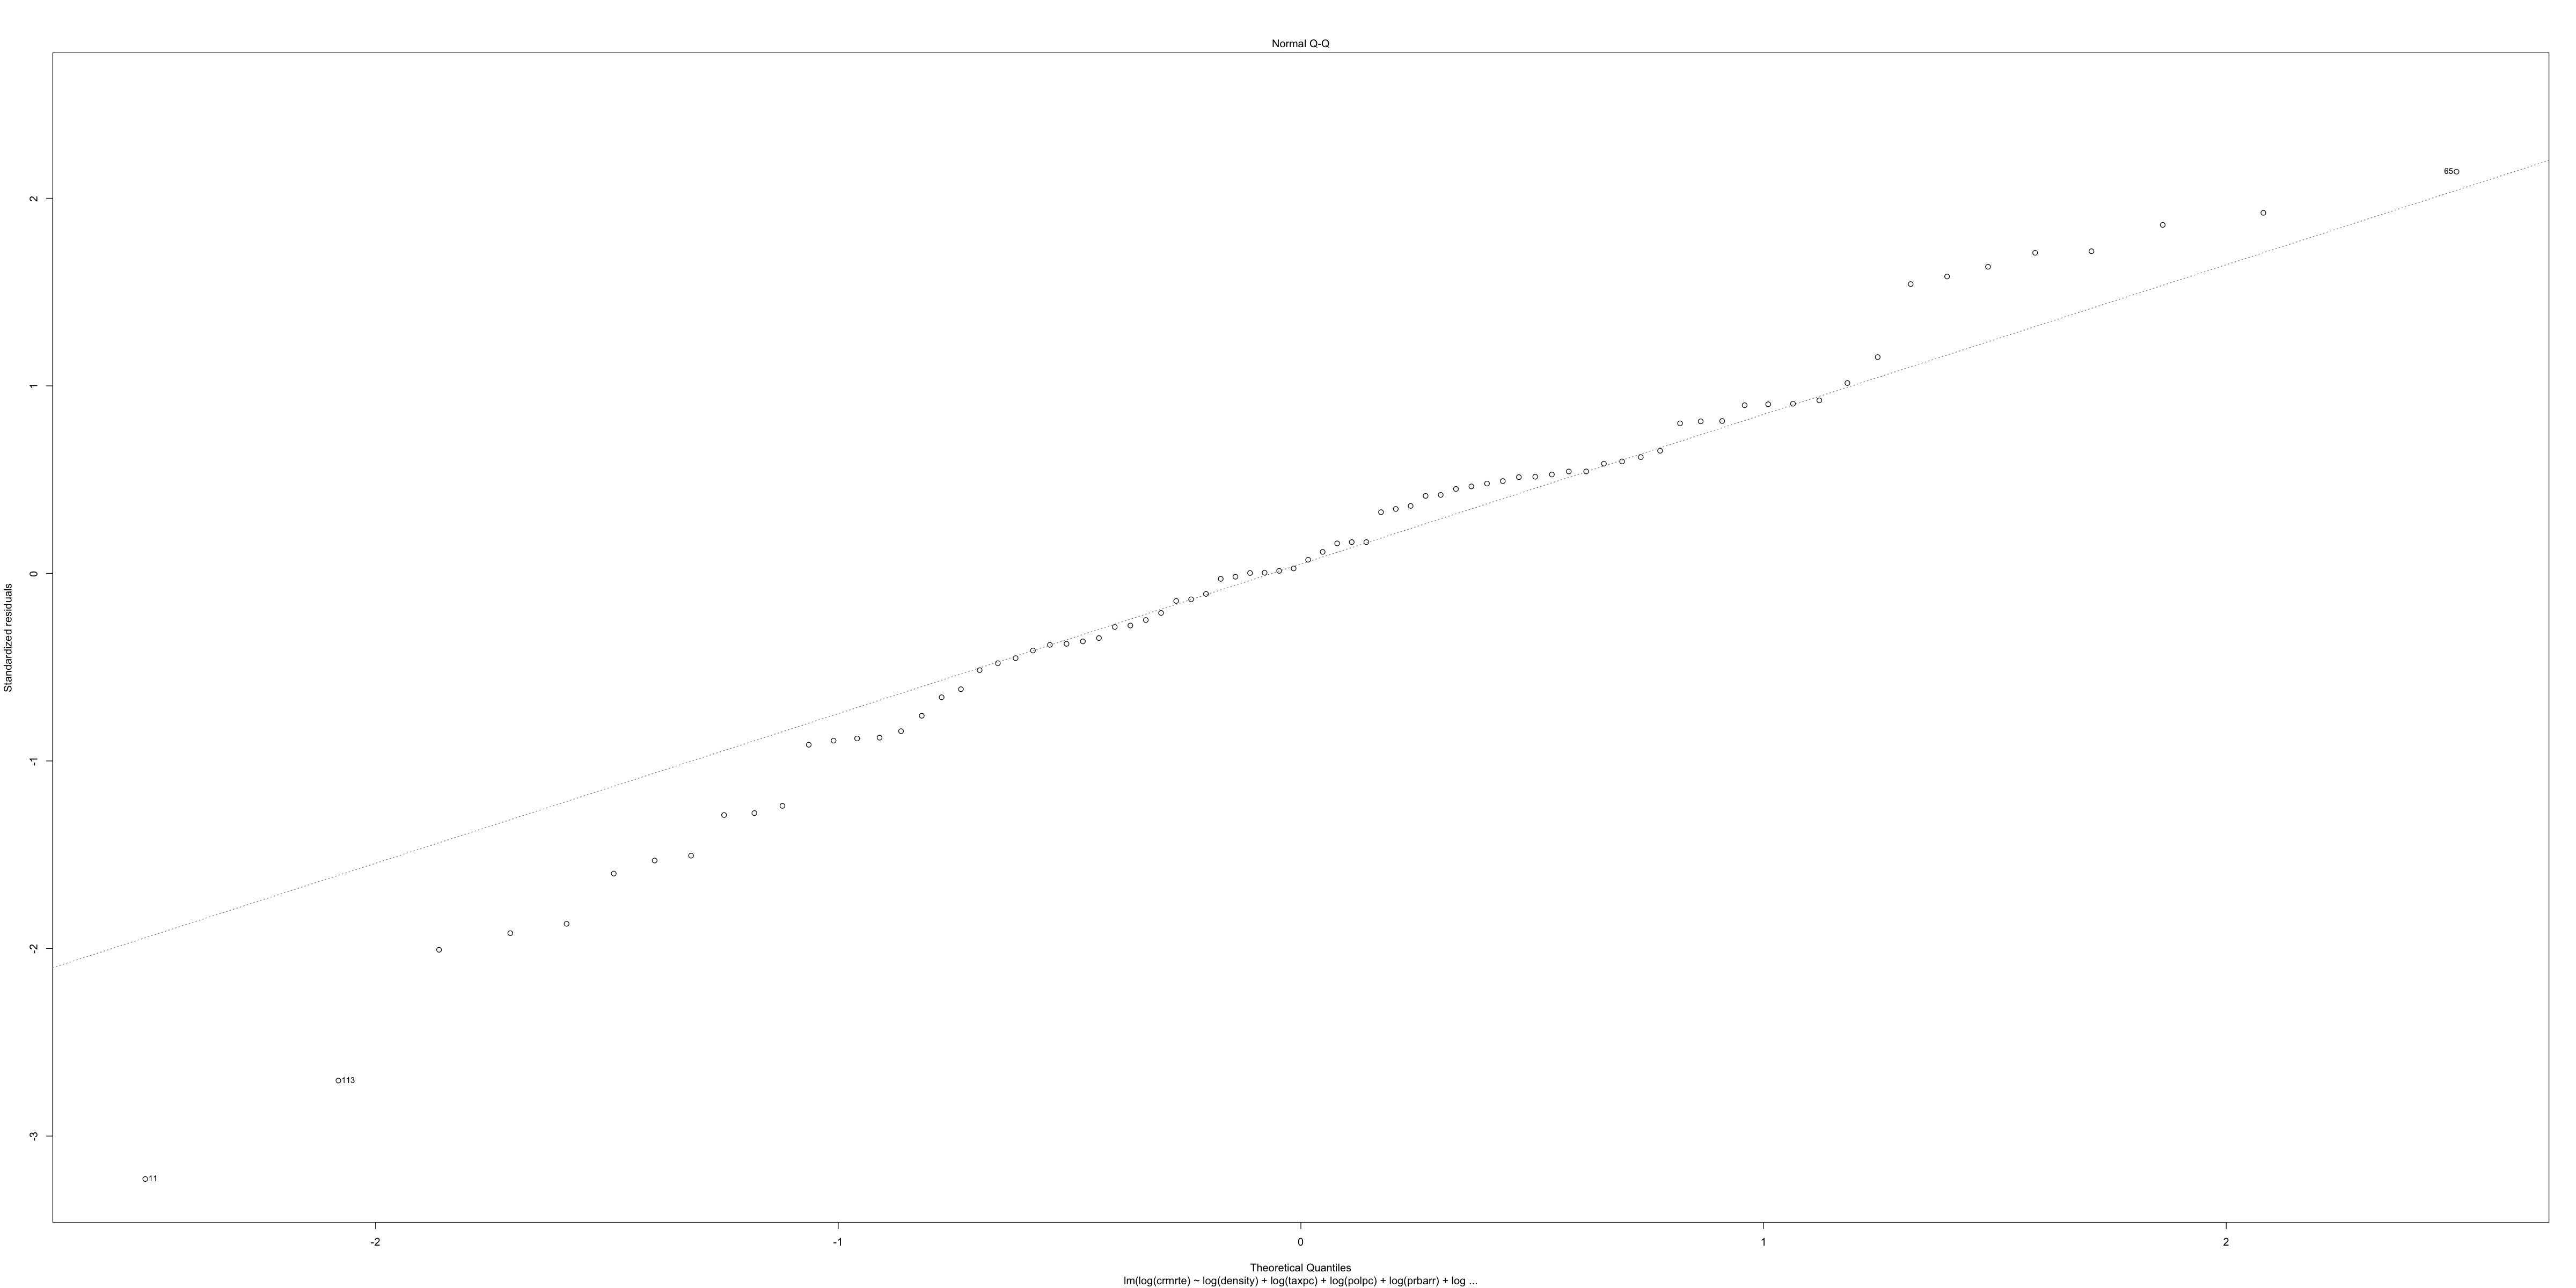

In [39]:
plot(model_1, which = 2)

From the QQplot, we see that while the majority of the data points fall on the line, there are extreme values on both lower and upper bounds. This indicates that there are some values at the extremes that do not match what we would expect in a normal distribution. 

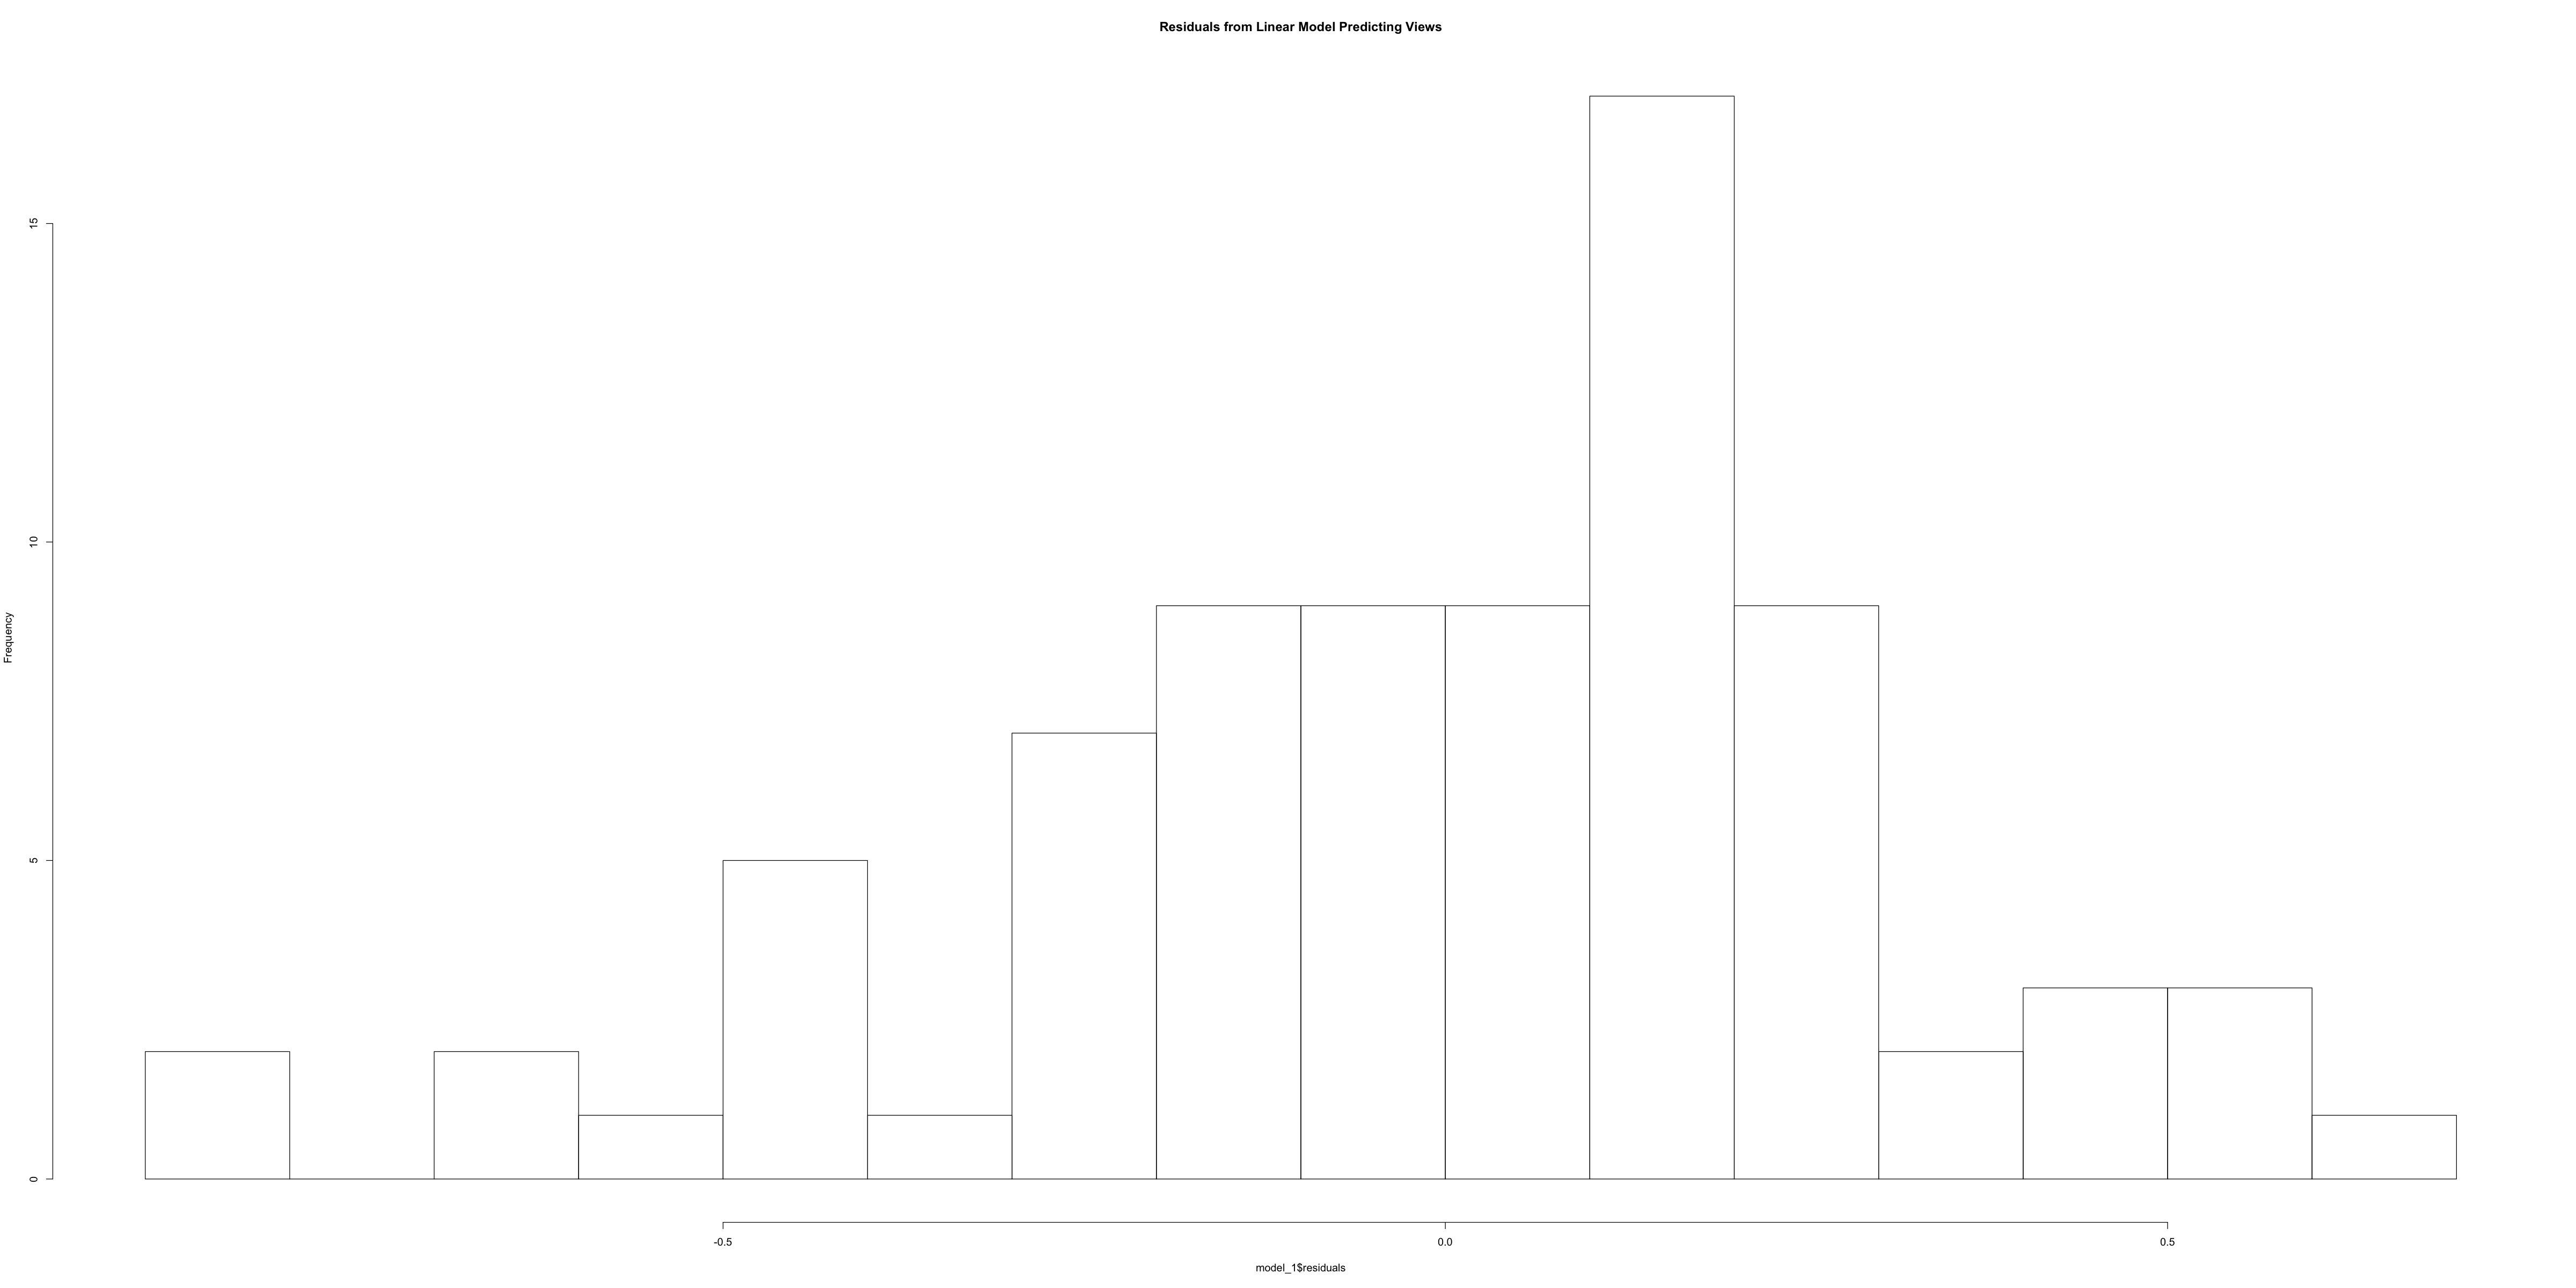

In [40]:
hist(model_1$residuals, breaks = 20, main = "Residuals from Linear Model Predicting Views")

As you can see from the above Q-Q plot and histogram, it looks like a normal distribution. 
So ***normality of errors is satisfied***.

## Model 2

We now are going to attempt to improve our model by introducing more covariates that we believe will improve the accuracy of the model. We select variables from the highest values of the correlation table calculated above and transform them to make them normal.

# TODO add more detail

### Model specifications

### Classical Linear Model Assumptions

#### present a detailed assessment of all 6 classical linear model assumptions. Use plots and other diagnostic tools to assess whether the assumptions appear to be violated, and follow best practices in responding to any violations you find. Note that we only want to see this level of detail for one model specification. For the other specifications, you should also conduct a full assessment of the CLM assumptions, but only highlight major surprises that you notice in your text.
#### Note that you may need to change your model specifications in response to violations of the CLM. At this point, you should also consider whether changes are appropriate to decrease standard errors for your estimates. These decisions involve tradeoffs and you should strive to be transparent about them in your report.

In [87]:
# creating variables for ease of use 
pctmin80 <- data_set.indexed$pctmin80
wages <- data_set.indexed$wages
pctymle <- data_set.indexed$pctymle
prbpris <- data_set.indexed$prbpris
avgsen <- data_set.indexed$avgsen
mix <- data_set.indexed$mix
wser <- data_set.indexed$wser
urban <- data_set.indexed$urban

We note that there are many wage variables in the data set that have a high correlation with crime rate. Since we are primarily concerned with formulating actionable policy insights for a political campaign, we propose to look at the combined effect of all wages on the crime rate. Since the range of data for each wage type is quite different from others, we will re-scale the wages between 0 and 1 before combining them.

In [88]:
wage_var_names = names(data_set.indexed) %in% c("wcon", "wtuc", "wtrd", "wfir",
"wser", "wmfg", "wfed", "wsta", "wloc")
wage_data <- data_set.indexed[wage_var_names]
stargazer(wage_data, header = FALSE)


\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
Statistic & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{St. Dev.} & \multicolumn{1}{c}{Min} & \multicolumn{1}{c}{Pctl(25)} & \multicolumn{1}{c}{Pctl(75)} & \multicolumn{1}{c}{Max} \\ 
\hline \\[-1.8ex] 
wcon & 80 & 287.905 & 48.320 & 193.643 & 250.809 & 315.818 & 436.767 \\ 
wtuc & 80 & 410.009 & 76.781 & 187.617 & 374.933 & 442.516 & 595.372 \\ 
wtrd & 80 & 212.455 & 33.985 & 154.209 & 192.779 & 224.924 & 354.676 \\ 
wfir & 80 & 322.044 & 50.777 & 234.522 & 287.494 & 339.054 & 509.466 \\ 
wser & 80 & 254.692 & 44.821 & 133.043 & 229.985 & 276.725 & 391.308 \\ 
wmfg & 80 & 336.162 & 86.112 & 157.410 & 290.098 & 359.265 & 646.850 \\ 
wfed & 80 & 444.914 & 61.369 & 326.100 & 404.297 & 478.895 & 597.950 \\ 
wsta & 80 & 359.810 & 42.897 & 267.780 & 329.377 & 384.088 & 499.590 \\ 
wloc & 80 & 311.623 & 28.221 & 239.170 & 29

We note that there seems to be a high max value but normal mean value for the weekly service wage, so we plot those values to visualize the data in this variable.

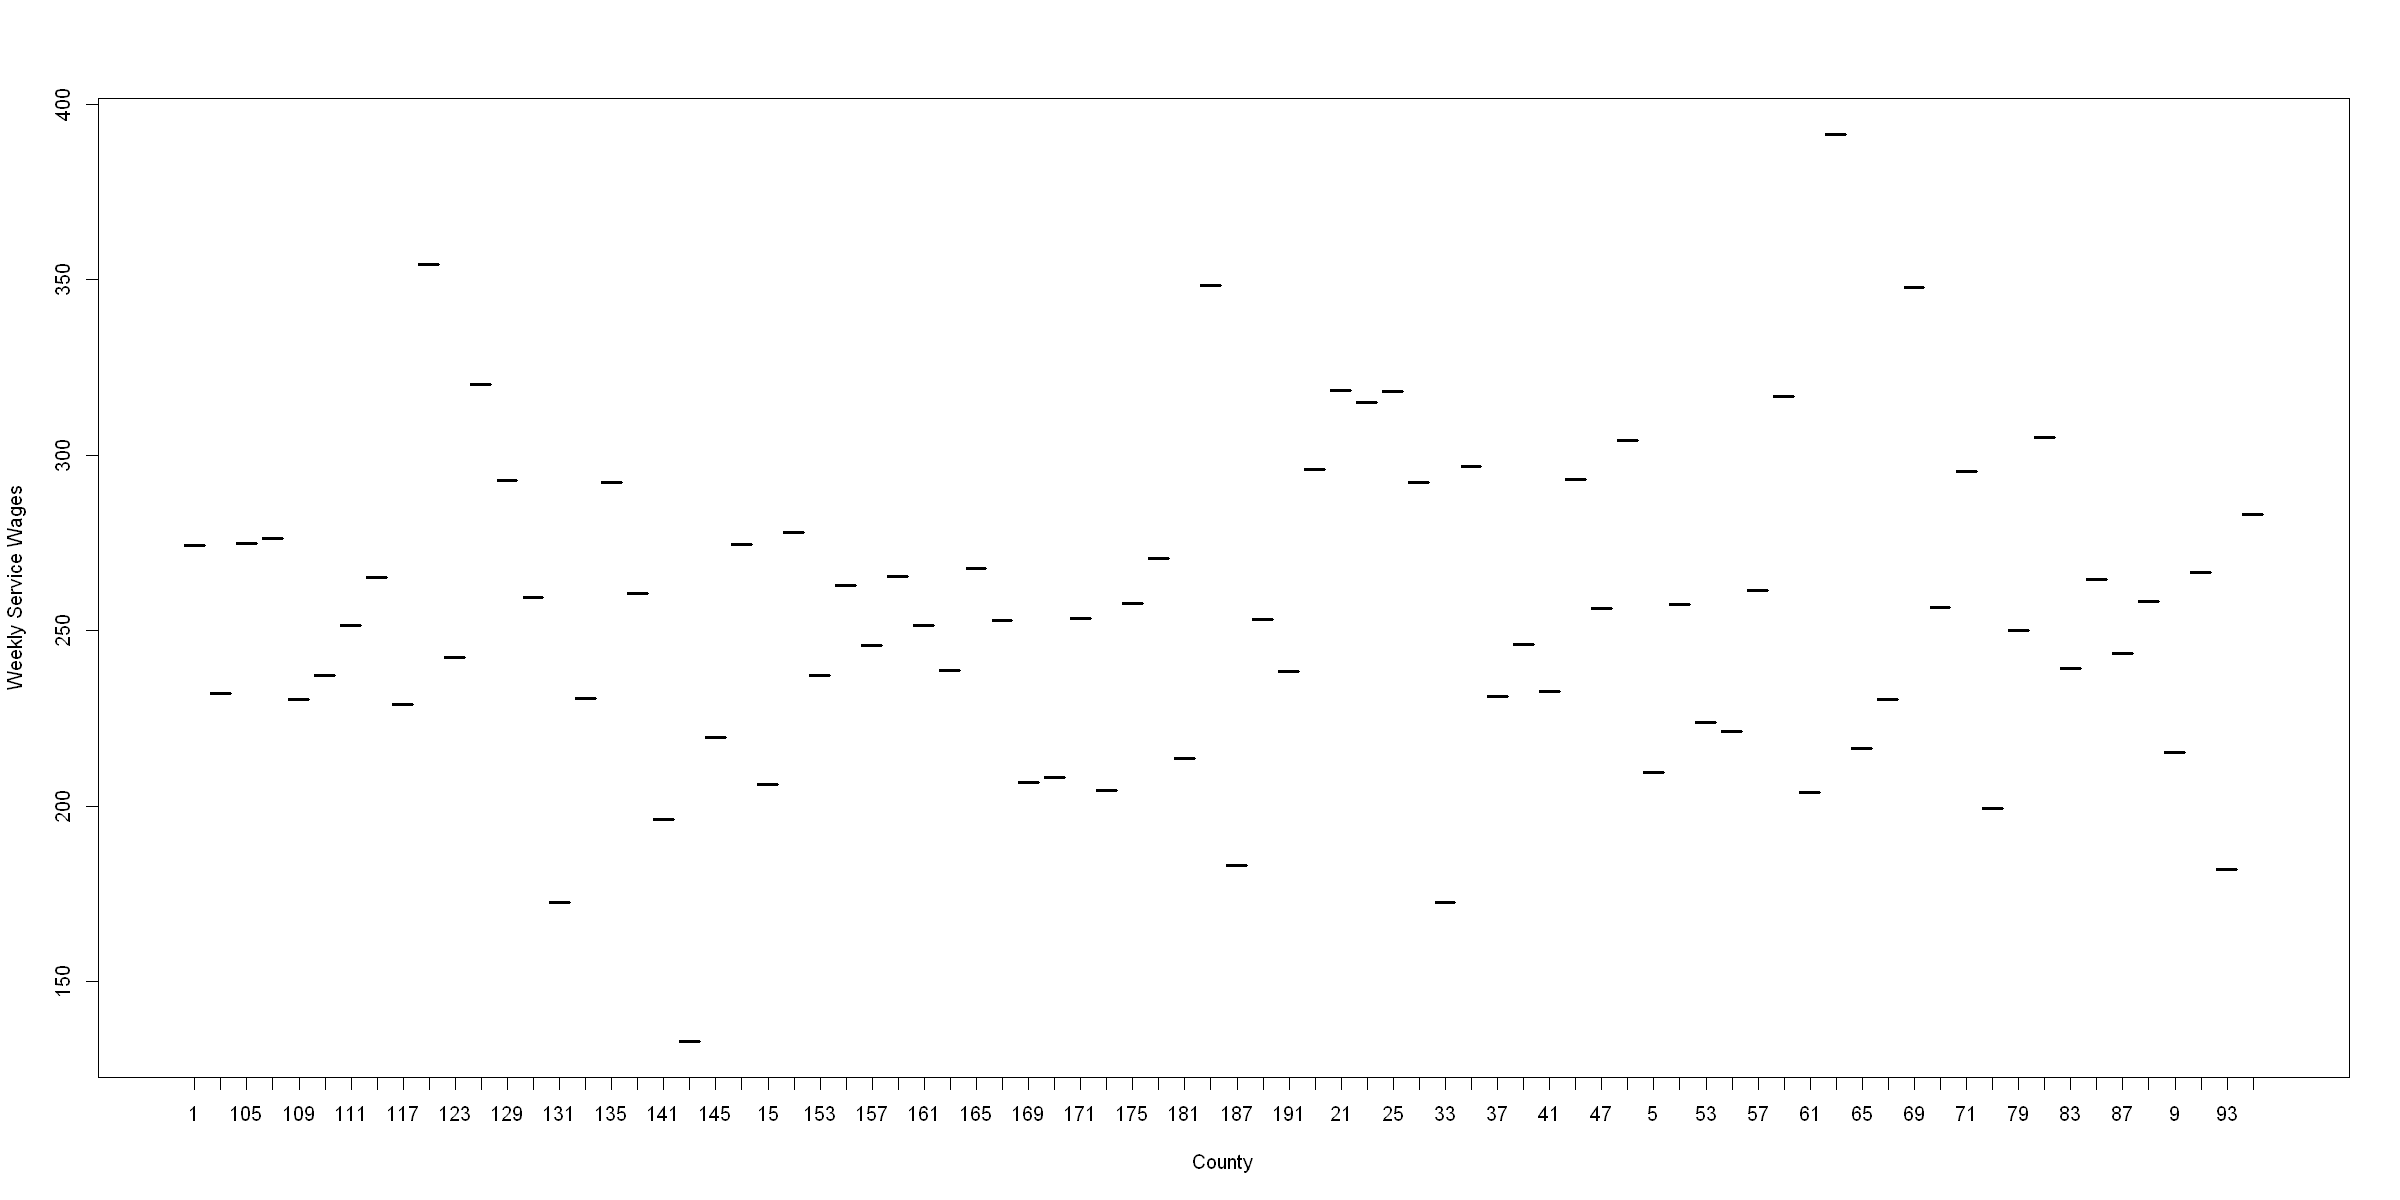

In [101]:
# add the rownames as a proper column
data_set.indexed <- cbind(Row.Names = rownames(data_set.indexed), data_set.indexed)

plot(x = data_set.indexed$Row.Names, y = data_set.indexed$wser, xlab = "County", ylab = "Weekly Service Wages")


Everything looks ok, so we keep it.

In [103]:
# Rescale
wages <- rescale(data_set.indexed$wfed,c(0,1)) + rescale(data_set.indexed$wtrd,c(0,1)) +
rescale(data_set.indexed$wcon,c(0,1)) + rescale(data_set.indexed$wmfg,c(0,1)) +
rescale(data_set.indexed$wloc,c(0,1)) + rescale(data_set.indexed$wfir,c(0,1)) +
rescale(data_set.indexed$wtuc,c(0,1)) + rescale(data_set.indexed$wtuc,c(0,1)) + 
rescale(data_set.indexed$wsta,c(0,1))

In [104]:
model_2 = lm(log(crmrte) ~ sqrt(density) + log(taxpc) + log(polpc) +
log(prbarr) + log(prbconv) + log(pctymle) +
(pctmin80) + wages,
data = data_set.indexed)

cat("Adjusted R2:", summary(model_2)$adj.r.squared, "\n")
cat("F statistic:", summary(model_2)$fstatistic[1], "on", summary(model_1)$fstatistic[2],
"predictor DF and", summary(model_2)$fstatistic[3], "observation DF", "\n")

coeftest(model_3, vcov = vcovHC, level = 0.05)

Adjusted R2: 0.7542047 
F statistic: 31.3007 on 5 predictor DF and 71 observation DF 



t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)     0.0361610  2.8460206  0.0127 0.9899008    
sqrt(density)   0.6198943  0.1564859  3.9613 0.0001854 ***
log(taxpc)      0.2382806  0.2668378  0.8930 0.3751128    
log(polpc)      0.5578390  0.2359973  2.3638 0.0210437 *  
log(prbarr)    -0.4298564  0.1193859 -3.6006 0.0006090 ***
log(prbconv)   -0.0370213  0.1496103 -0.2475 0.8053271    
log(pctymle)    0.1305826  0.2777975  0.4701 0.6398588    
pctmin80        0.0126591  0.0022581  5.6062 4.384e-07 ***
wages          -0.0103037  0.0634642 -0.1624 0.8715229    
prbpris        -0.1064902  0.5624943 -0.1893 0.8504247    
log(avgsen)    -0.1020822  0.1617735 -0.6310 0.5302069    
log(mix)       -0.0686724  0.1049467 -0.6544 0.5151568    
log(wser)      -0.3327754  0.3414817 -0.9745 0.3333645    
factor(urban)1 -0.3352861  0.2154715 -1.5561 0.1244769    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## Model 3

We now attempt to make our model the most accurate by including almost every variable in our data set. When appropriate, we transform them to make them normal.

# TODO add more detail

### Model specifications

### Classical Linear Model Assumptions

#### present a detailed assessment of all 6 classical linear model assumptions. Use plots and other diagnostic tools to assess whether the assumptions appear to be violated, and follow best practices in responding to any violations you find. Note that we only want to see this level of detail for one model specification. For the other specifications, you should also conduct a full assessment of the CLM assumptions, but only highlight major surprises that you notice in your text.
#### Note that you may need to change your model specifications in response to violations of the CLM. At this point, you should also consider whether changes are appropriate to decrease standard errors for your estimates. These decisions involve tradeoffs and you should strive to be transparent about them in your report.

In [105]:
model_3 = lm(log(crmrte) ~ sqrt(density) + log(taxpc) + log(polpc) +
log(prbarr) + log(prbconv) + log(pctymle) +
(pctmin80) + (wages) + (prbpris) + log(avgsen) + log(mix) +
log(wser) + factor(urban),
data = data_set.indexed)
cat("Adjusted R2:", summary(model_3)$adj.r.squared, "\n")
cat("F statistic:", summary(model_3)$fstatistic[1], "on", summary(model_1)$fstatistic[2],
"predictor DF and", summary(model_3)$fstatistic[3], "observation DF", "\n")

coeftest(model_3, vcov = vcovHC, level = 0.05)

Adjusted R2: 0.7643679 
F statistic: 20.71295 on 5 predictor DF and 66 observation DF 



t test of coefficients:

                  Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)     0.16791148  2.91807081  0.0575 0.9542873    
sqrt(density)   0.61028610  0.15615360  3.9082 0.0002217 ***
log(taxpc)      0.23813749  0.26760400  0.8899 0.3767585    
log(polpc)      0.55490328  0.23642951  2.3470 0.0219344 *  
log(prbarr)    -0.42884952  0.11967618 -3.5834 0.0006434 ***
log(prbconv)   -0.03945798  0.14868852 -0.2654 0.7915489    
log(pctymle)    0.13812338  0.28410739  0.4862 0.6284597    
pctmin80        0.01256639  0.00230544  5.4507 8.028e-07 ***
wages           0.00061179  0.05575953  0.0110 0.9912789    
prbpris        -0.10953062  0.56187295 -0.1949 0.8460400    
log(avgsen)    -0.10466886  0.16049383 -0.6522 0.5165580    
log(mix)       -0.06623044  0.10348172 -0.6400 0.5243748    
log(wser)      -0.35855842  0.34953226 -1.0258 0.3087199    
factor(urban)1 -0.33634660  0.21448616 -1.5682 0.1216283    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

## Regression Table

### Valid standard errors
#### TO DO add valid standard errors to your regression table.

Suggestions from Group
- Text discussion of significance (Need to iron model out first)

In [106]:
model_1.se  <- sqrt(diag(vcovHC(model_1))) # heteroskedasticity consistent standard errors
model_2.se  <- sqrt(diag(vcovHC(model_2))) # heteroskedasticity consistent standard errors
model_3.se  <- sqrt(diag(vcovHC(model_3))) # heteroskedasticity consistent standard errors

stargazer(model_1, model_2, model_3,
    type = "text", omit.stat = "f",
    se = list(model_1.se, model_2.se, model_3.se),
    star.cutoffs = c(0.05, 0.01, 0.001),
    no.space = TRUE, align = TRUE)


                                  Dependent variable:              
                    -----------------------------------------------
                                      log(crmrte)                  
                          (1)             (2)             (3)      
-------------------------------------------------------------------
sqrt(density)          0.403***         0.439**        0.610***    
                        (0.107)         (0.146)         (0.156)    
log(taxpc)               0.129           0.135           0.238     
                        (0.230)         (0.264)         (0.268)    
log(polpc)              0.518*          0.523*          0.555*     
                        (0.235)         (0.227)         (0.236)    
log(prbarr)            -0.372**        -0.465***       -0.429***   
                        (0.140)         (0.128)         (0.120)    
log(prbconv)             0.024          -0.034          -0.039     
                        (0.180)         (0.140)

# Causal estimates

## TO DO

# Omitted variables discussion

Suggestion from Group
- Discussion of variables missing in report, not ignored variables.

Brainstorming:
- Race
- education
- firearm ownership (% in county or guns/person metric)
- Prior arrest/conviction arrests, repeat offenders
- security prevalence (security guard usage, security camera setups maybe some shops are just easier to rob)
- Crimes that are not discovered
- Family situation (Negligence, single parent families)
- Does income(wages) take into account expenditure (money needed to live in county). perhaps wages in one area would still be considered below poverty level in some counties. Maybe there are families living beyond their means.
- Risk factors like Gambling? that may contribute to the need to resort to crime
- 


The county identifier and year variables were excluded from the linear models. Year was excluded because it had the same value for every data row and offered no useful insight. The county identifier appears to be simply included for keeping track of the records and consequently also offered no useful insight into crime rate.

We also elected to exclude the west and central variables as they appeared to not have much effect on our crime rate.

# Conclusion

# TODO add more detail

#### Note also that you may need to adjust your conclusions in response to statistical significance. Make sure that you discuss both statistical and practical significance for your key effects of interest. 

#### You may want to include statistical tests besides the standard t-tests for regression coefficients.

#### We will assess your final report using a rubric that includes the elements listed above. We will also consider whether you have correctly included elements of statistical inference in your report. In particular, we will look to see whether you have correctly assessed the CLM assumptions and whether you have responded appropriately to any violations.

Based on the analysis and comparison of our different models, we conclude that density, police percentage, and probability of arrest have the largest effect on crime rate.



#### Policy Suggestions

In order to reduce crime rate, the actionable policy suggestions that we suggest for the local government are as follows:

- Increase the size of the police force in North Carolina
- Increase the probability of arrest when offense occurs.
- Focus these changes on areas with greater density.